# House Price Prediction

## Problem statement

To build a regression model for a US-based housing company that has decided to enter the Australian market and intends to use data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The data set based on the sale of houses in Australia has been provided and the objective is to design a model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Business Goal
- Understanding which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

In [591]:
# import all necessory packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler

#example for encoding
#encoder = LabelEncoder() 
#df['Encoded'] = encoder.fit_transform(df['Category']) 

import os
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


import warnings
warnings.filterwarnings("ignore")

## <span style="color:blue"> Step 1: Reading and Understanding the Data </span>

In [592]:
# Find the file encoding 

##Dataset file encoding check
import chardet
import os
my_file = os.path.join(r"train.csv")
rawdata = open(my_file, 'rb').readline()

my_encoding = chardet.detect(rawdata)
print("File encoding details are as follows:\n",my_encoding)

File encoding details are as follows:
 {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [593]:
# As the above output shows data is competely in ASCII format, we can now read it in dataframe

file_path = r"train.csv"
df = pd.read_csv(file_path)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [594]:
#Check the shape of the dataframe

df.shape

(1460, 81)

In [595]:
# Check quick stats of dataframe

df.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [596]:
df.describe(include='object').transpose()

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## <span style="color:blue"> Step 2: Data Cleaning & Manupulation </span>

In [598]:
# Check for dupliate enteries
original_shape = df.shape[0]
df.drop_duplicates(inplace=True)
new_shape = df.shape[0]
print(original_shape - new_shape)

0


In [599]:
# Striping off white space from column names 
df.rename(columns= lambda x: x.strip(), inplace=True)

In [600]:
# Check missing value percentage
missing_percentage = round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending = False)
missing_percentage[missing_percentage > 0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [601]:
categoric_null_cols = df.select_dtypes(include=['object'])
missing_percentage_categoric = round(categoric_null_cols.isnull().sum()/categoric_null_cols.shape[0]*100,2).sort_values(ascending = False)
missing_percentage_categoric[missing_percentage_categoric > 0].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
       'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'MasVnrType',
       'Electrical'],
      dtype='object')

In [602]:
##Considering the aspect of 'meaningful missing'. Replace nulls with 'None' where null implies absence of feature (from data dictionary)
cat_null_obj_cols = missing_percentage_categoric[missing_percentage_categoric > 0].index
for column in cat_null_obj_cols:
    df[column]= df[column].fillna('None')

In [603]:
#Check Again
missing_percentage = round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending = False)
missing_percentage[missing_percentage > 0]

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
dtype: float64

In [604]:

# Filtered missing percentage data
filtered_missing_percentage = missing_percentage_categoric[missing_percentage_categoric > 0]

# Create a bar plot using Plotly
fig = px.bar(x=filtered_missing_percentage.index, y=filtered_missing_percentage.values,
             labels={'x': 'Columns', 'y': 'Missing Percentage'},
             title='Percentage of Missing Values by Column', color_discrete_sequence=['lightblue'])

# Update layout for better visualization
fig.update_layout(xaxis_tickangle=-45, yaxis=dict(title='% Missing'))

# Add annotations to the bars
for i, value in enumerate(filtered_missing_percentage.values):
    fig.add_annotation(x=filtered_missing_percentage.index[i], y=value + 1,
                       text=f"{value}%", showarrow=False)

# Show the plot
fig.show()


In [605]:
##Considering the aspect of 'meaningful missing'. Replace nulls with 'None' where null implies absence of feature
cat_null_obj_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
       'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2',
       'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'MasVnrType',
       'Electrical']
for column in cat_null_obj_cols:
    df[column]= df[column].fillna('None')

In [606]:
##Removing categorical features that have more than 80% data associated to one single value.
##Removing the skewed data

imbalanced_cols = [col for col in df.select_dtypes(include=['object'])
                  if df[col].value_counts().max() > 80 * len(df) / 100]

In [607]:
print(len(imbalanced_cols), imbalanced_cols)

24 ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [608]:
##Dropping columns with skewed data 
df = df.drop(imbalanced_cols, axis=1)
df.shape

(1460, 57)

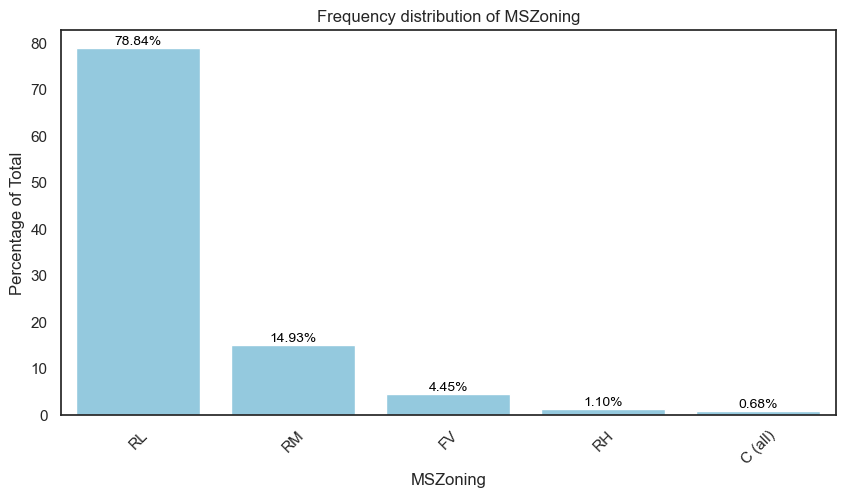

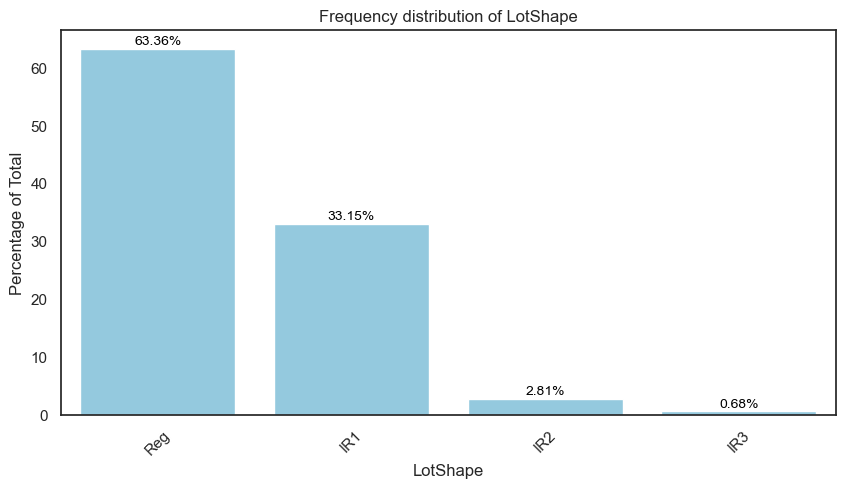

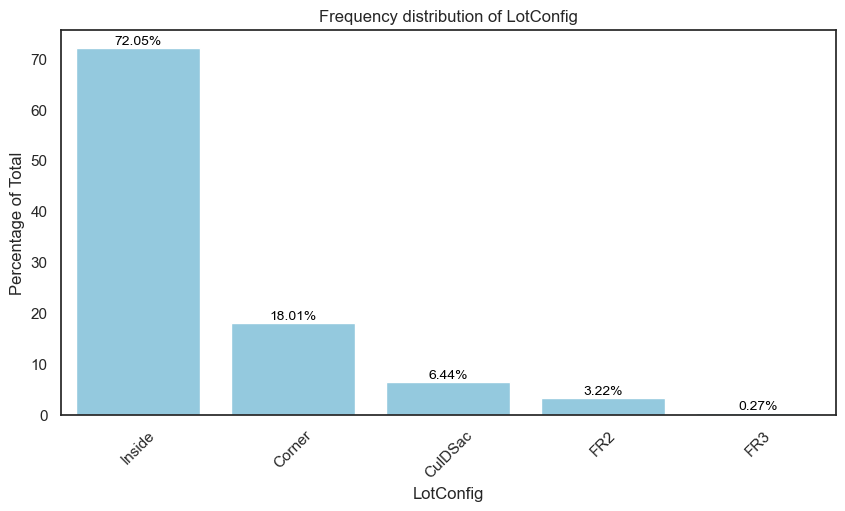

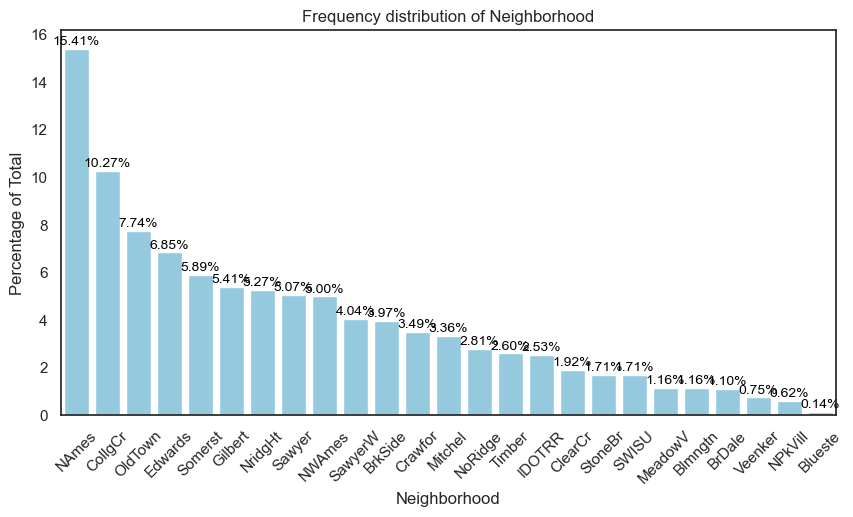

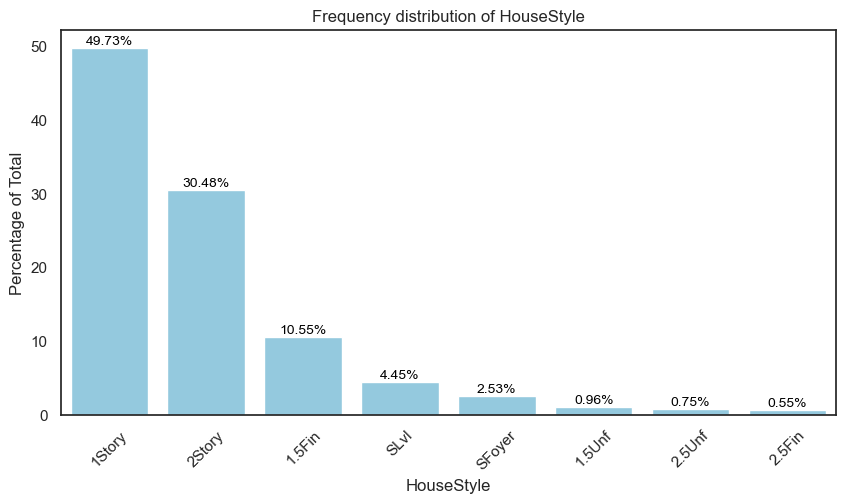

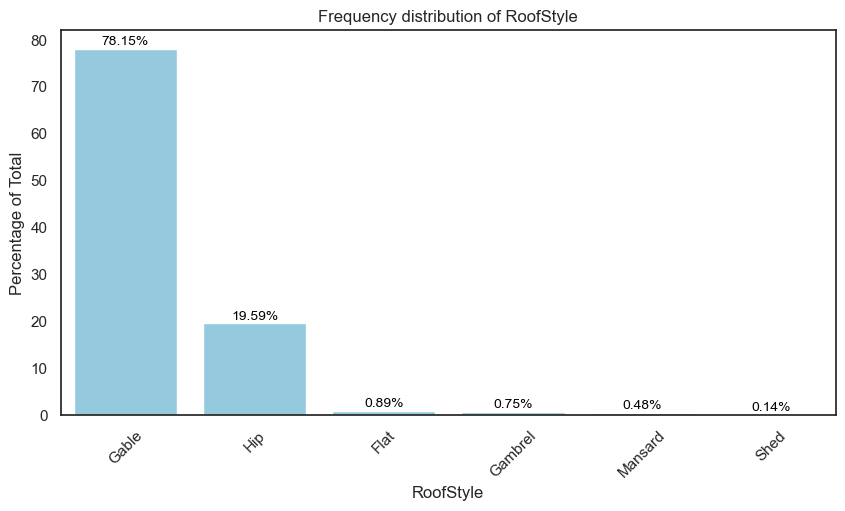

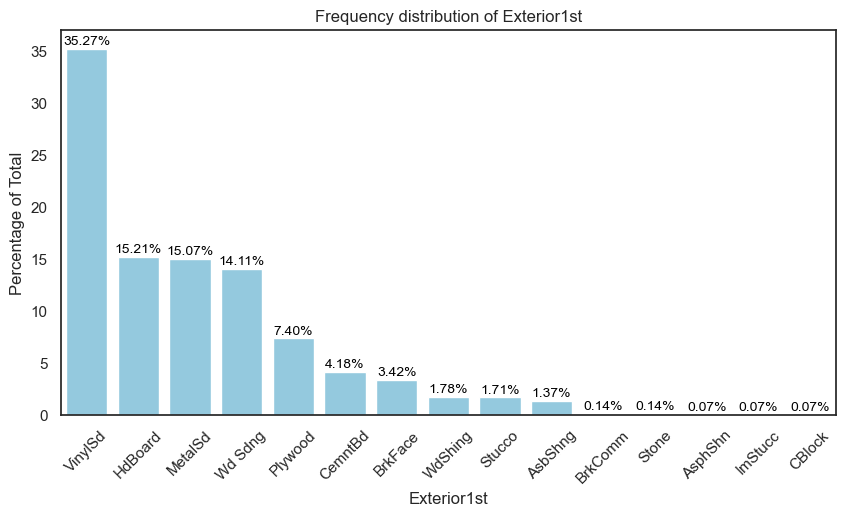

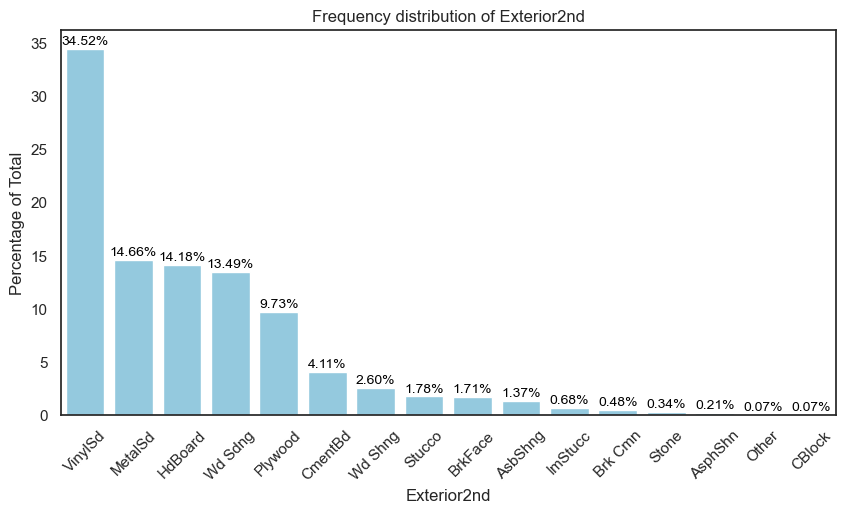

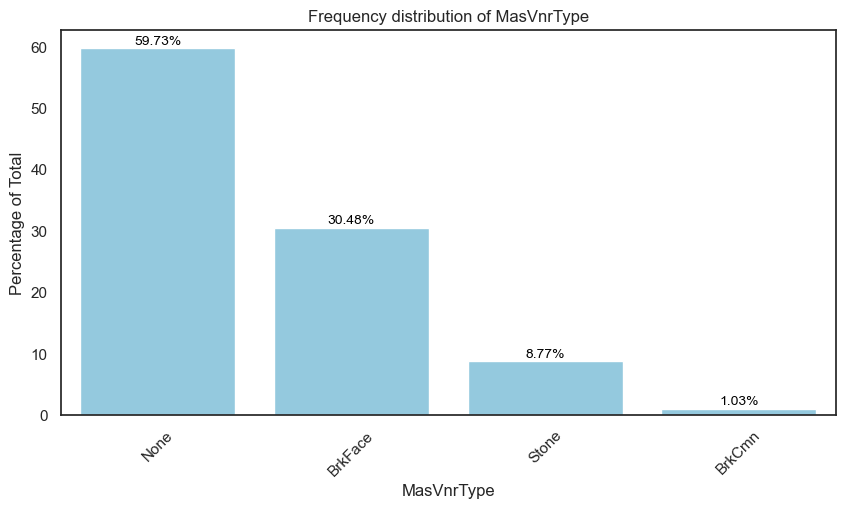

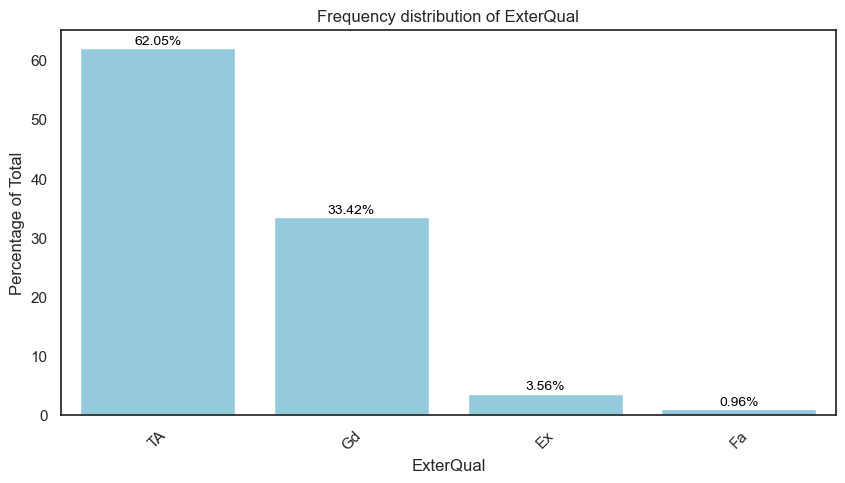

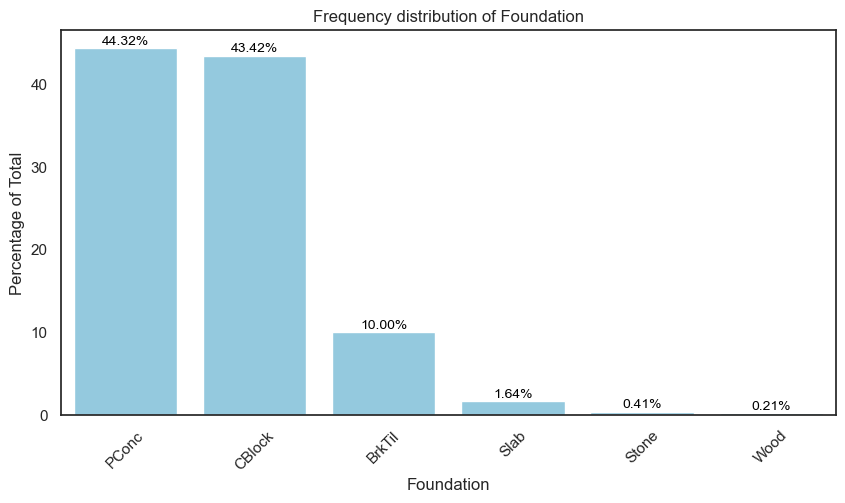

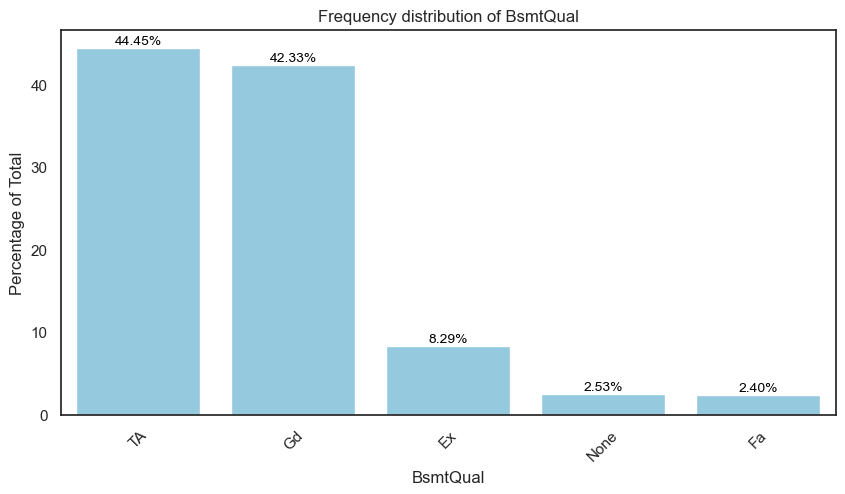

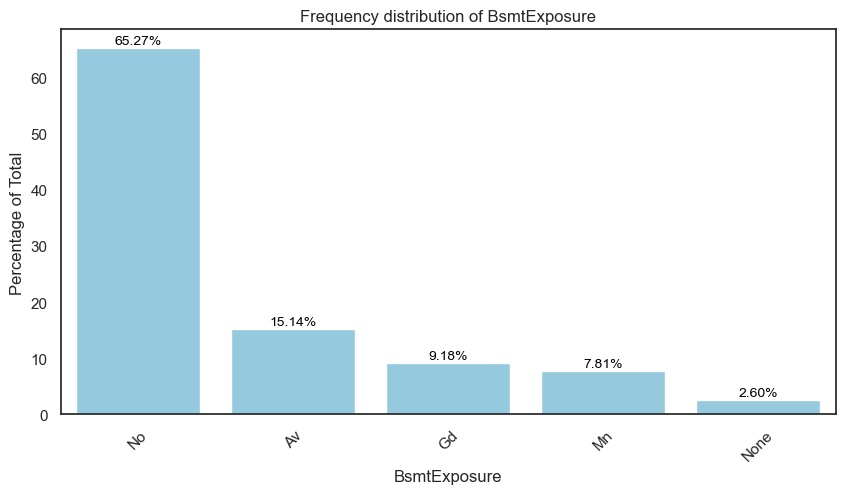

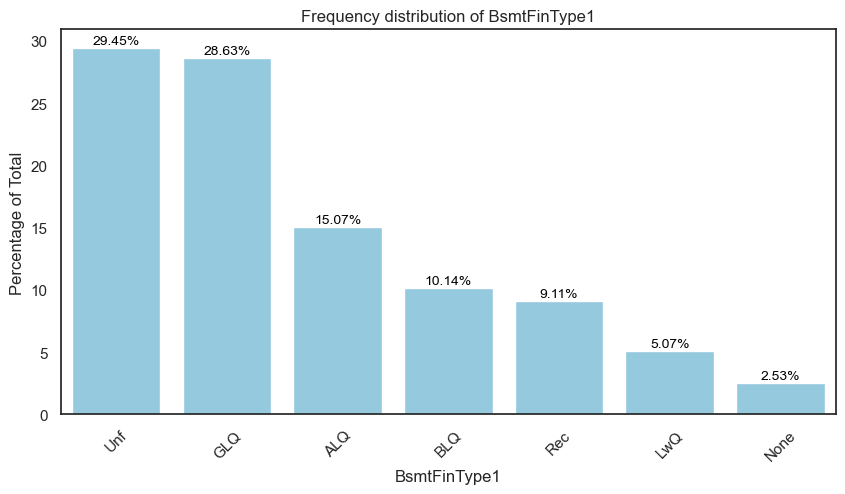

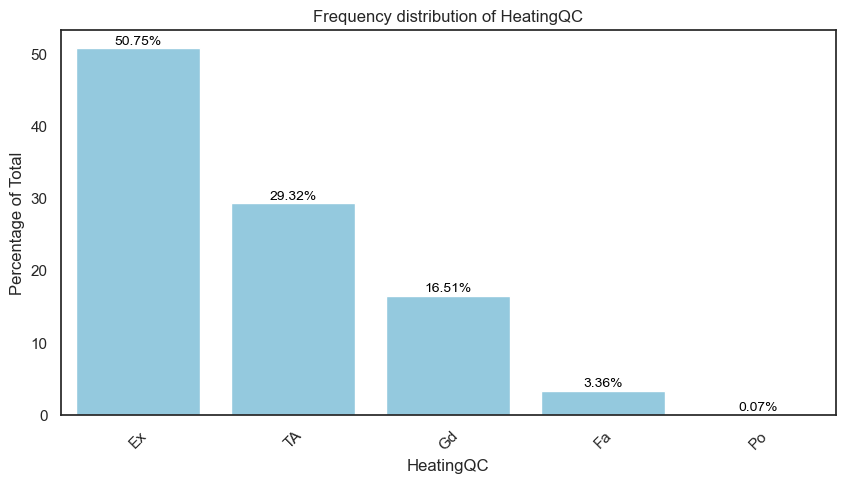

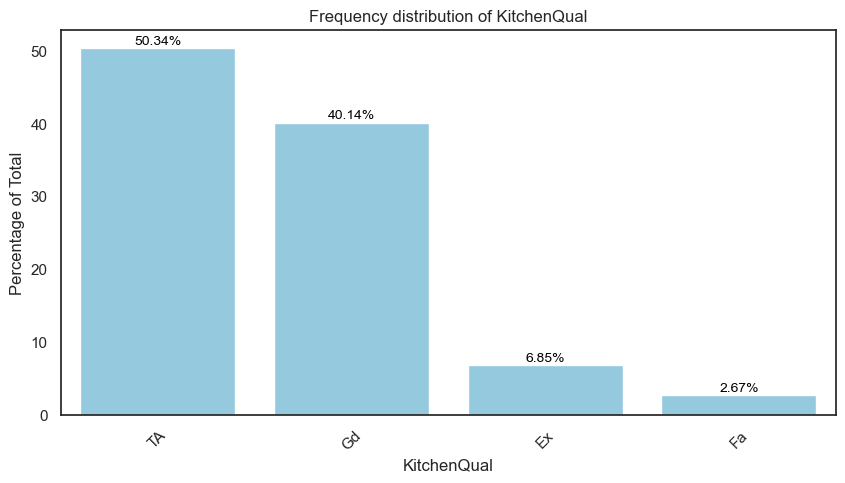

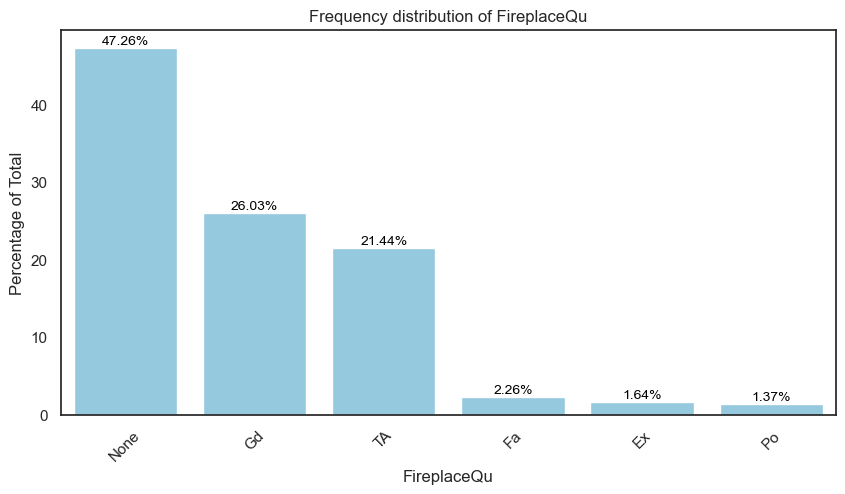

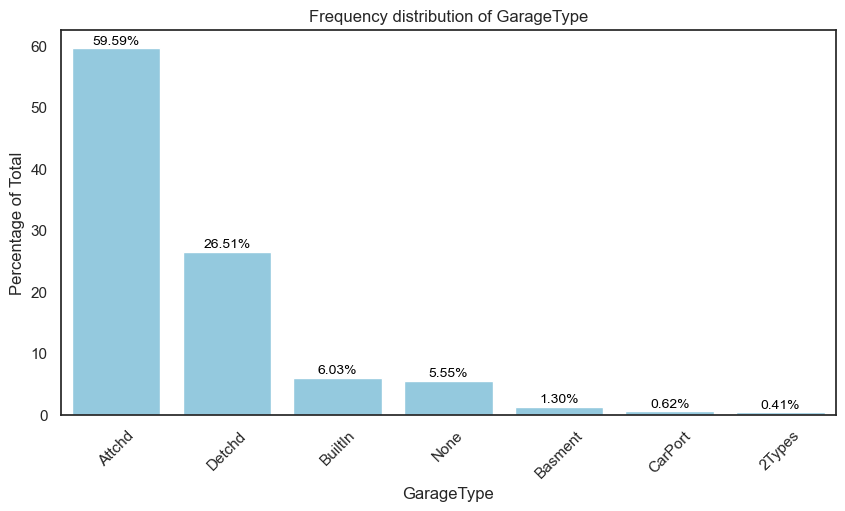

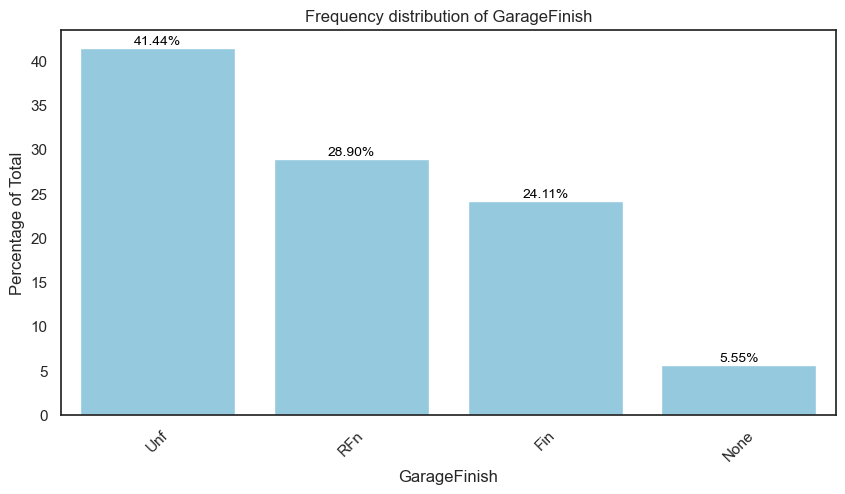

In [609]:
# PLot all categorial variables
def plot_categorical(df, col):
    plt.figure(figsize=(10, 5))
    counts = df[col].value_counts(normalize=True) * 100
    ax = sns.barplot(x=counts.index, y=counts.values, color='skyblue')
    plt.title(f'Frequency distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage of Total')
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()

def plot_categorical_variables(df):
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        plot_categorical(df, col)


plot_categorical_variables(df)


### Observations:
- Most preferred 
    - **MSZone** is **RL** with **78.84%**
    - **LotShape** is **Reg** with **63.36%**
    - **LotConfig** is **Inside** with **72%**
    - **LotConfig** is **Inside** with **72%**
    - **HouseStype** is **1Story** with **49.7%**
    - **RoofStle** is **Gable** with **78.15%**
    - **Exterior1st** is **VinylSd** with **35.27%**
    - **Exterior2nd** is **VinylSd** with **34.42%**
    - **ExterQual** is **TA** with **62.05%**
    - **Foundation** is **PConc** with **44.32%** followed by **CBlock** with **43.42%**
    - **BsmtQual** is **TA** with **44.45%** followed by **Gd** with **42.33%**
    - **BsmtFinType1** is **unf** with **29%** followed by **GLQ** with **28%3**
    - **HeadtingQC** is **EX** with **50%** 
    - **KitchenQual** is **TA** with **50%** 
    - **GarageType** is **Attached** with **59.59%** 
    - **GarageFinish** is **Unf** with **41.44%** 
    - **Neighborhood is **NAmes** with **15.41** & **CollegeCr** with **10.27**
    
- Features with most of them None
    - MisFeature **96.40%**
    - Fence **80.75%
    - PoolQC **88.52**
    - FireplaceQC **47.26**
    - MasVnrType **59.73**
    - Alley **93.77**
    
    
    

In [610]:
# Checking the numeric data columns which has NULL's
df[['LotFrontage','GarageYrBlt','MasVnrArea']].describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1])

LotFrontage  GarageYrBlt   MasVnrArea
count  1201.000000  1379.000000  1452.000000
mean     70.049958  1978.506164   103.685262
std      24.284752    24.689725   181.066207
min      21.000000  1900.000000     0.000000
10%      44.000000  1945.000000     0.000000
25%      59.000000  1961.000000     0.000000
50%      69.000000  1980.000000     0.000000
75%      80.000000  2002.000000   166.000000
85%      90.000000  2005.000000   262.350000
90%      96.000000  2006.000000   335.000000
95%     107.000000  2007.000000   456.000000
98%     124.000000  2008.000000   650.980000
99%     141.000000  2009.000000   791.920000
100%    313.000000  2010.000000  1600.000000
max     313.000000  2010.000000  1600.000000

In [611]:
# Check MasVnrArea post filtering out zero's
df_MasVnrArea = df.MasVnrArea[~(df.MasVnrArea==0)]
df_MasVnrArea.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99, 1])

count     591.000000
mean      254.739425
std       205.144174
min         1.000000
10%        70.000000
25%       113.000000
50%       203.000000
75%       330.500000
85%       424.500000
90%       481.000000
95%       650.500000
98%       862.000000
99%      1032.600000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

### Observation
- LotFrontage mean and median are close and hence we use median
- For MasVnrArea there are many zero values, post excluding zeros the median is 203 We can use that to impute

In [612]:
##Impute the null values with median values for 'LotFrontage' and 'MasVnrArea' columns
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df_MasVnrArea.median())

In [613]:
##Filling the null values with 0 for 'GarageYrBlt'
df['GarageYrBlt']= df['GarageYrBlt'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int) 

### Derived Features based on Metadata

In [614]:
# Create a new column named 'WhetherRemodelled'
# determine whether the house has been remodelled or not based on 'YearBuilt' and 'YearRemodAdd' 

def Remodel_Check(row):     
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0     #Indicate not Remodelled
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1     #Indicated Remodelled
    else:
        return 2    #Any other observation check
    
df['WhetherRemodelled'] = df.apply(Remodel_Check, axis=1)
df.WhetherRemodelled.value_counts()

0    764
1    696
Name: WhetherRemodelled, dtype: int64

In [615]:
##Derive a new variable named 'AgeofProperty' to determine the age of property since the built

def find_age_since_built(row):
        return row['YrSold'] - row['YearBuilt']
    
df['AgeofProperty'] = df.apply(find_age_since_built, axis=1)


In [616]:
##Dropping the raw attributes from which the new features were derived. These aren't necessary for analysis
##Dropping 'YrSold', 'YearRemodAdd' and 'YearBuilt'

df = df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1)


In [617]:
df.shape

(1460, 56)

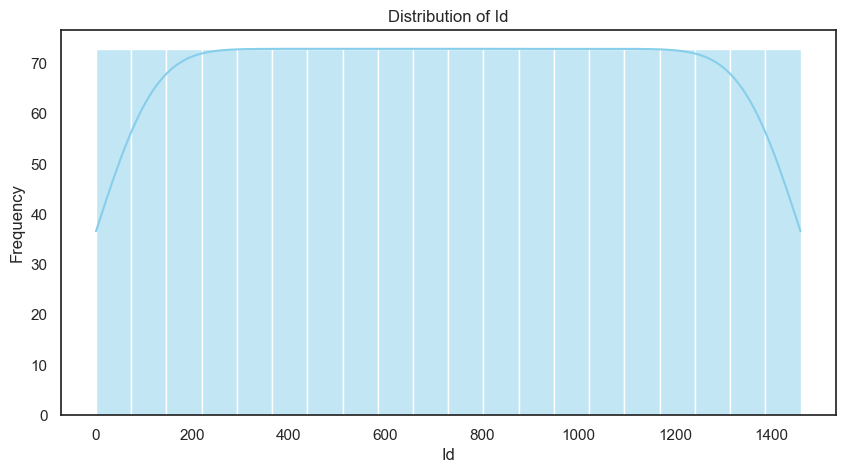

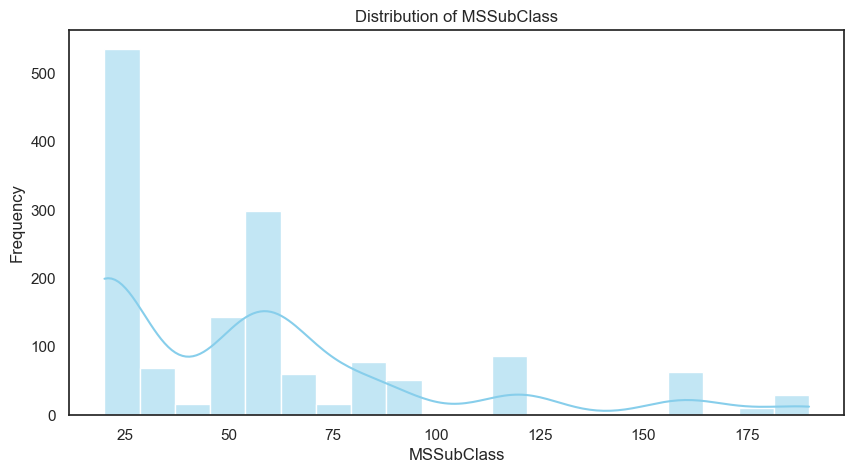

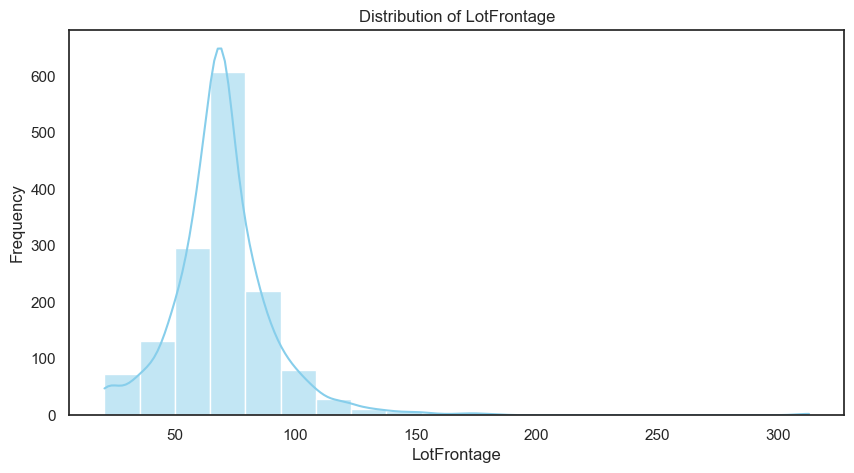

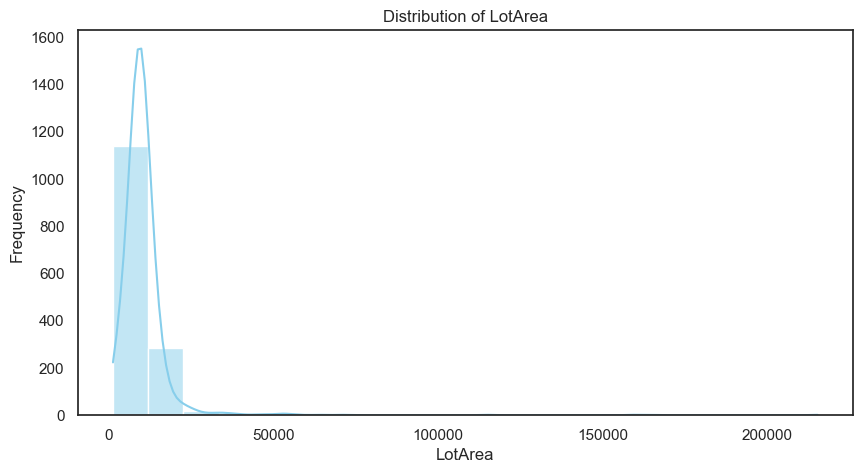

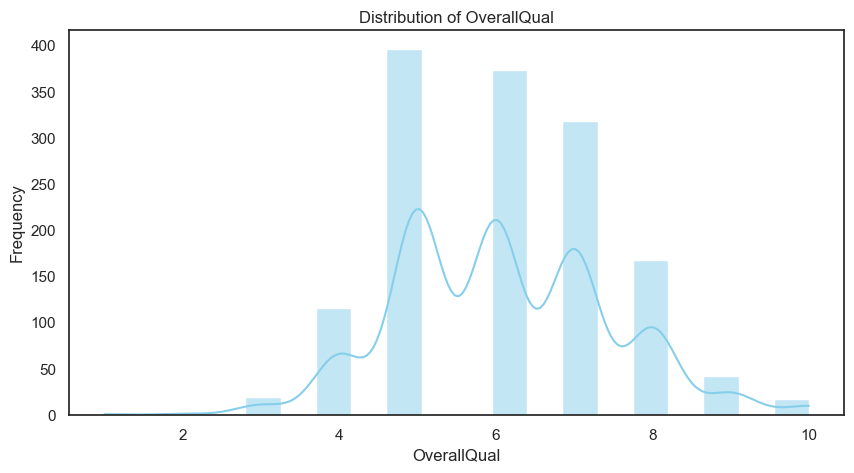

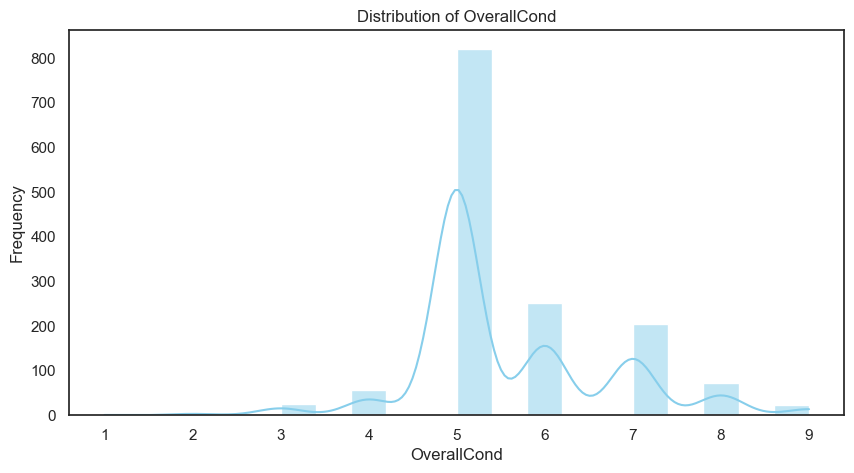

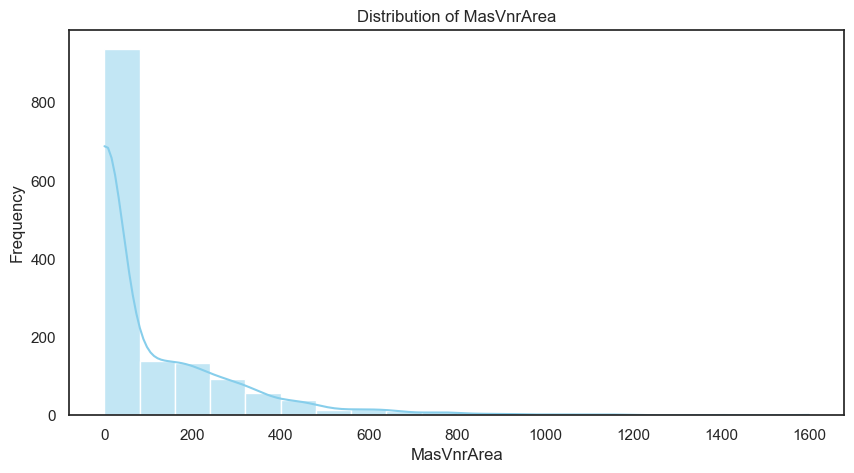

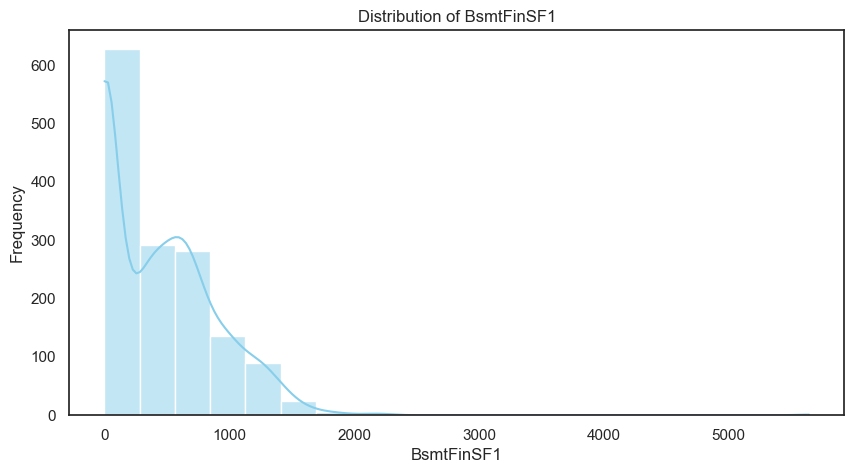

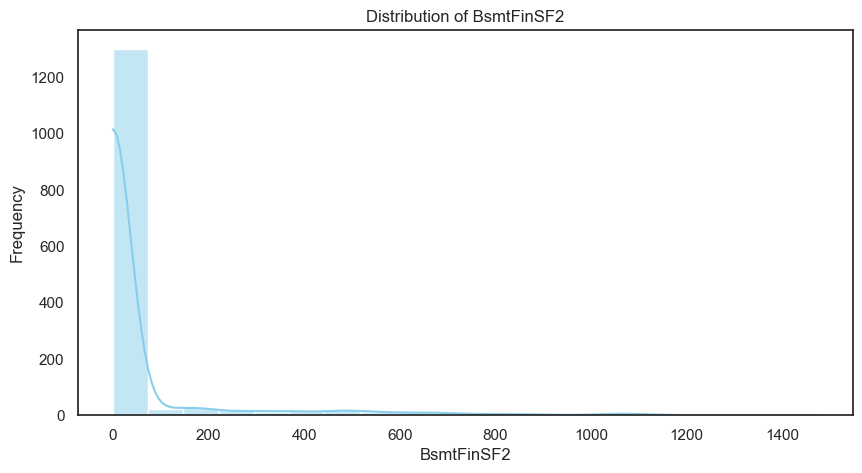

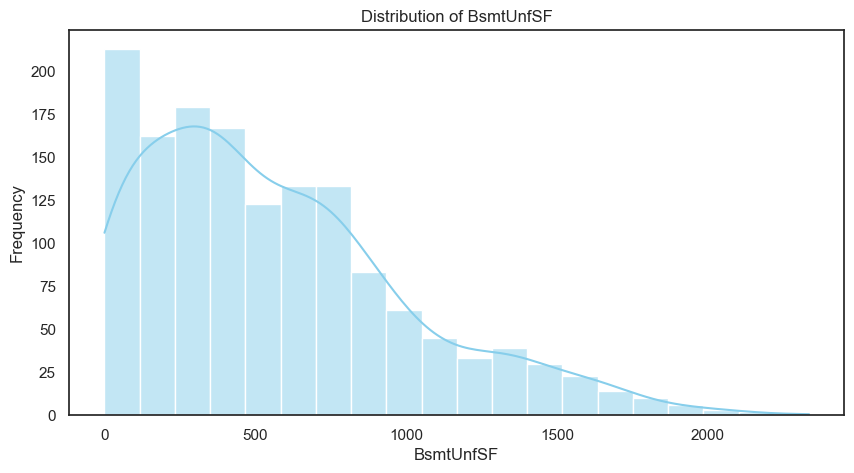

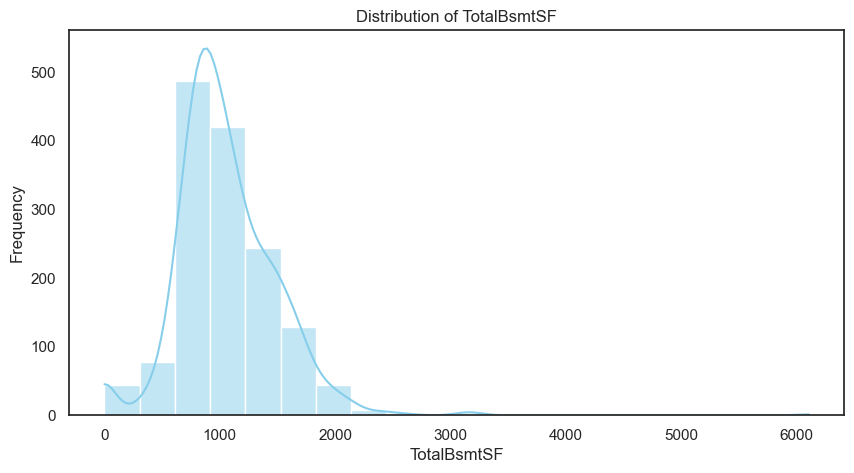

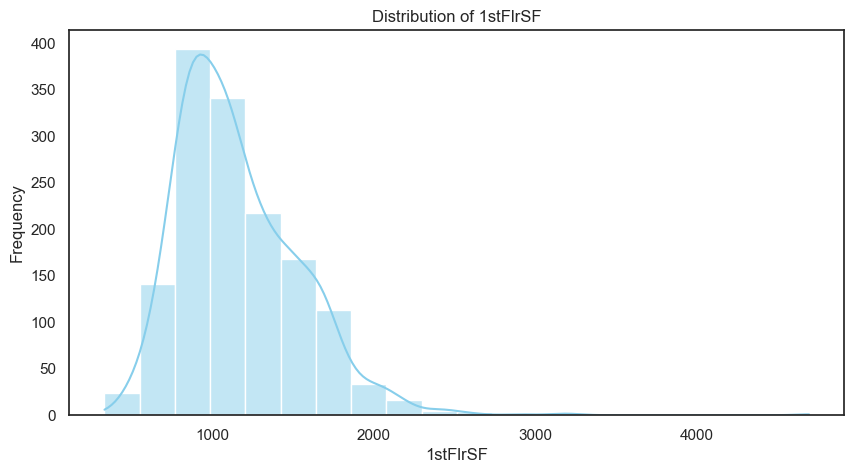

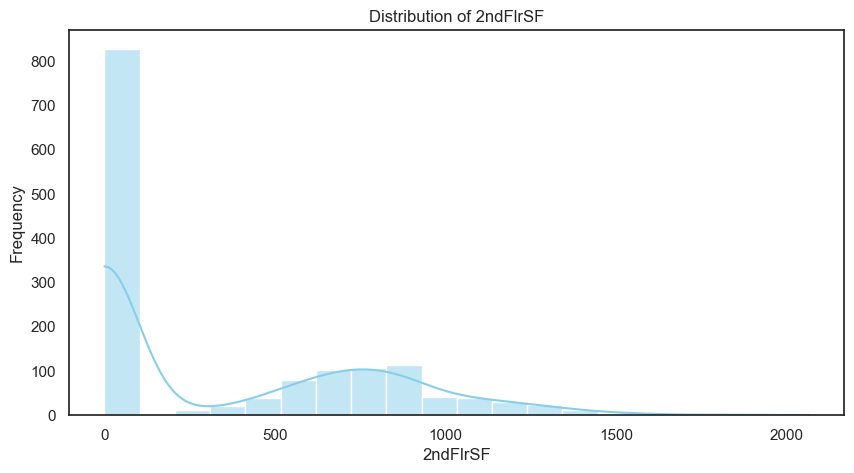

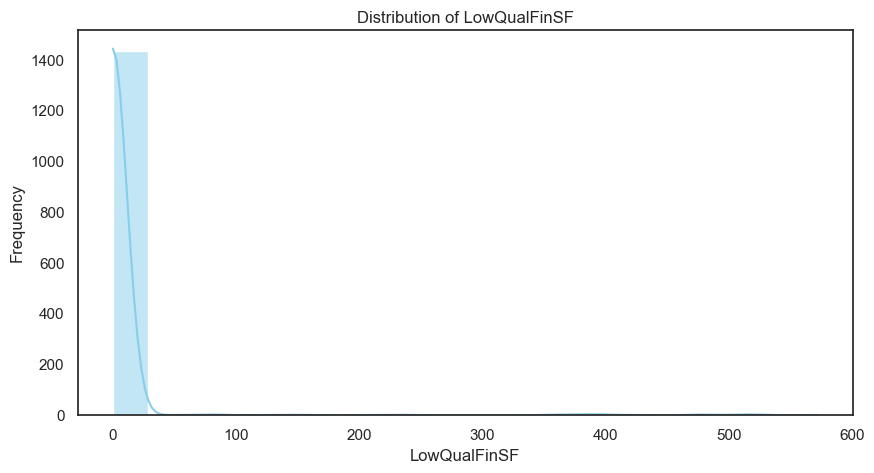

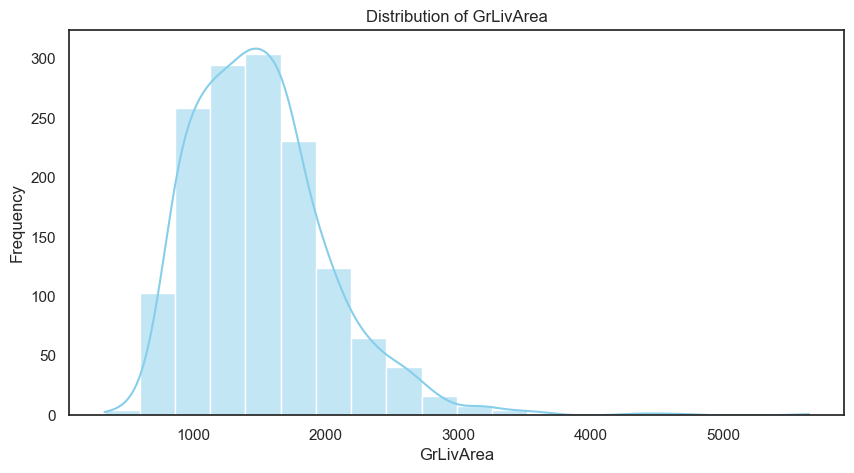

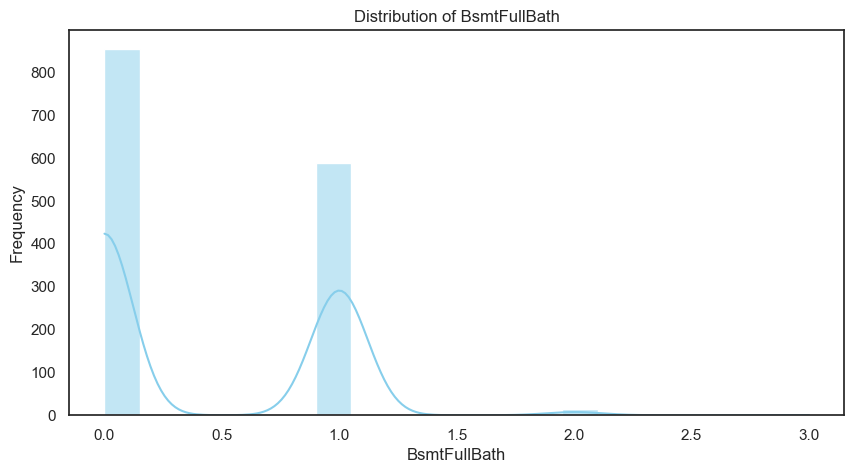

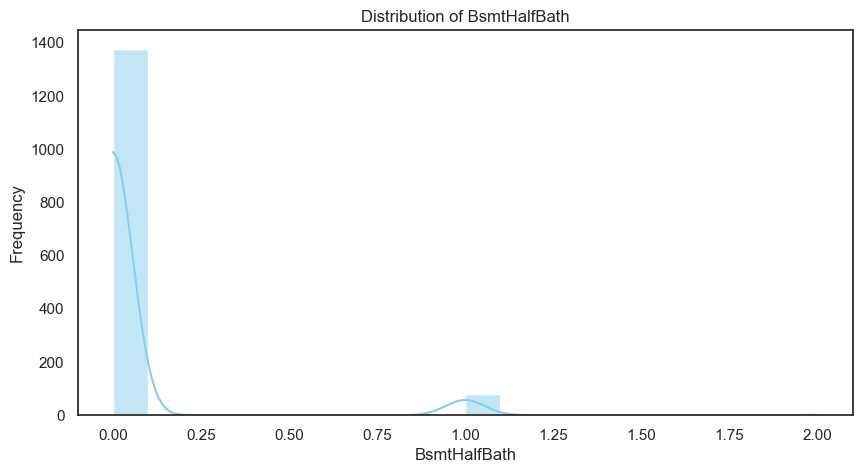

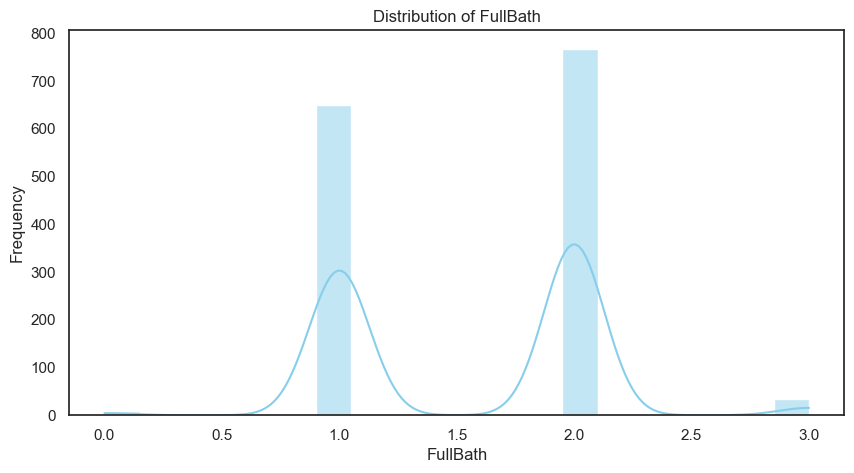

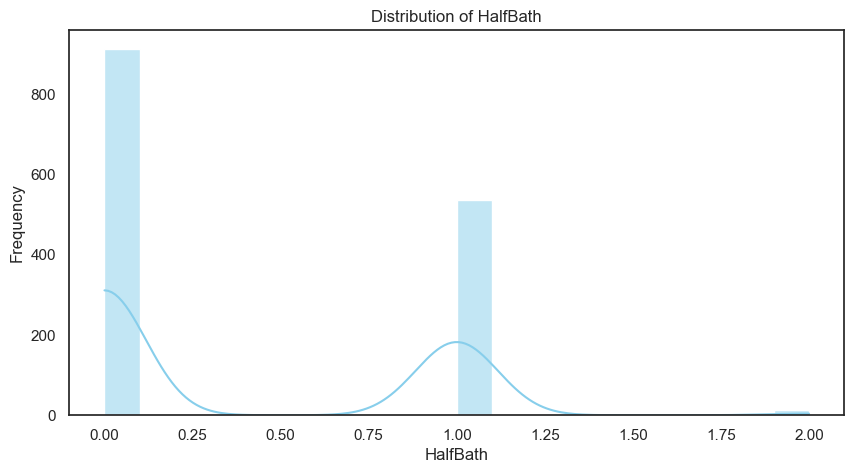

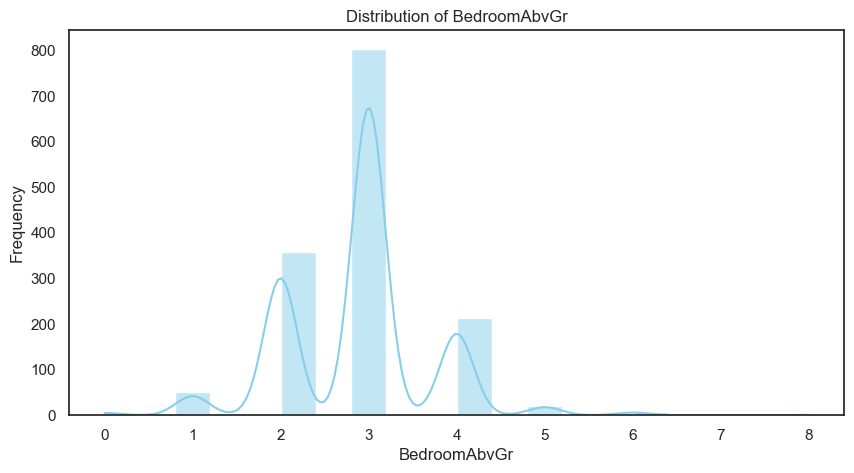

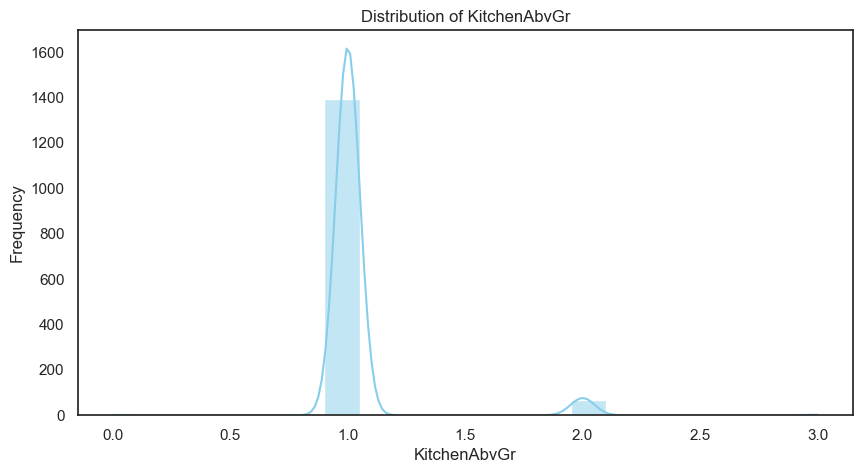

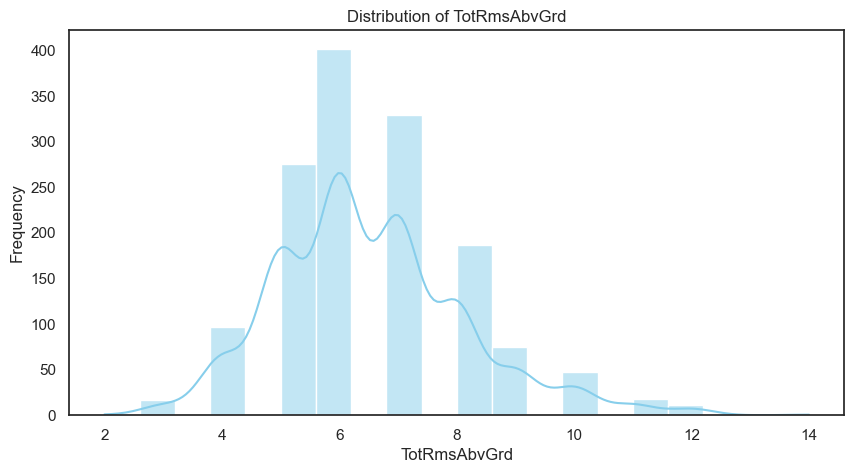

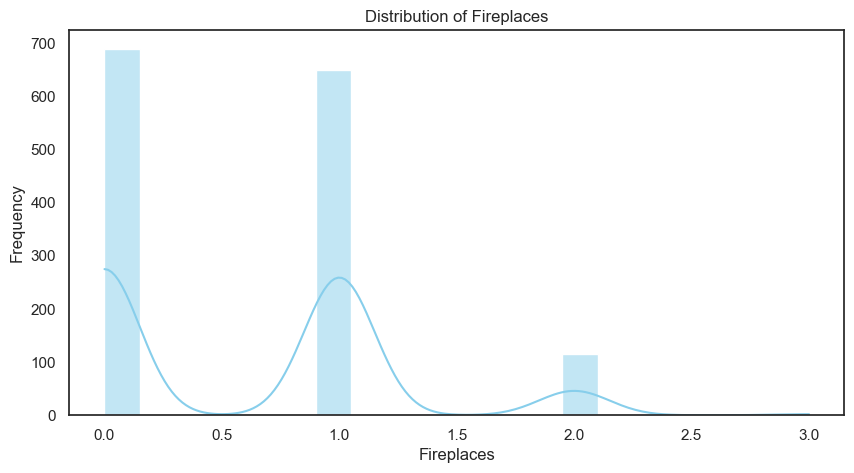

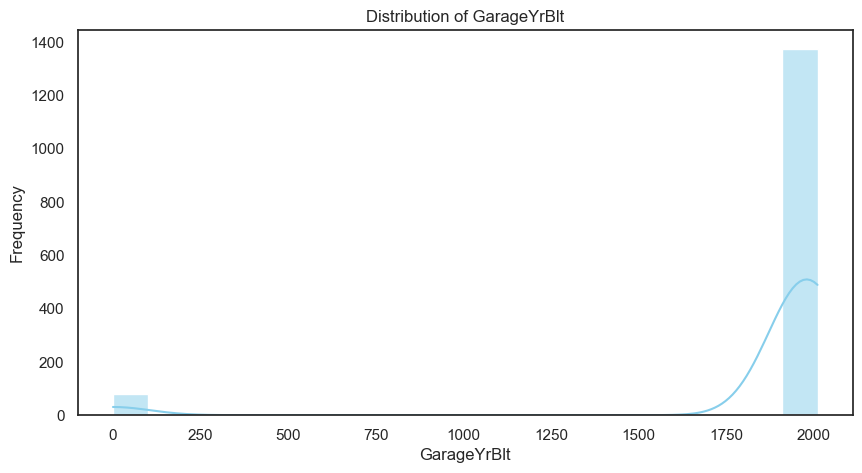

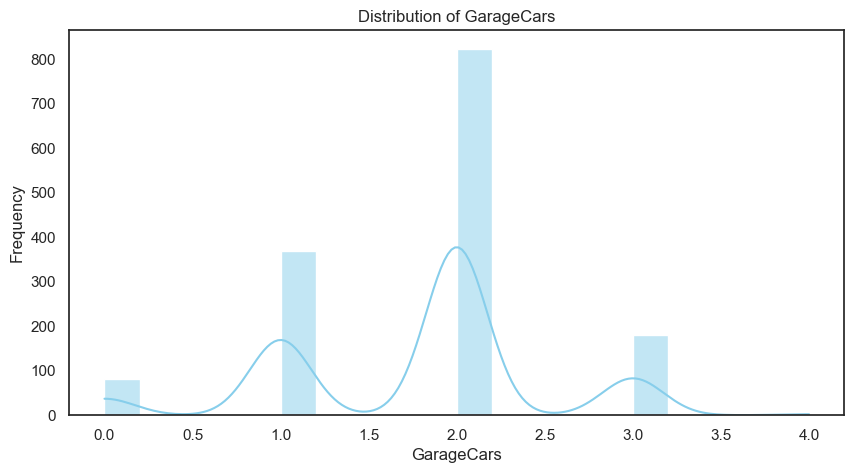

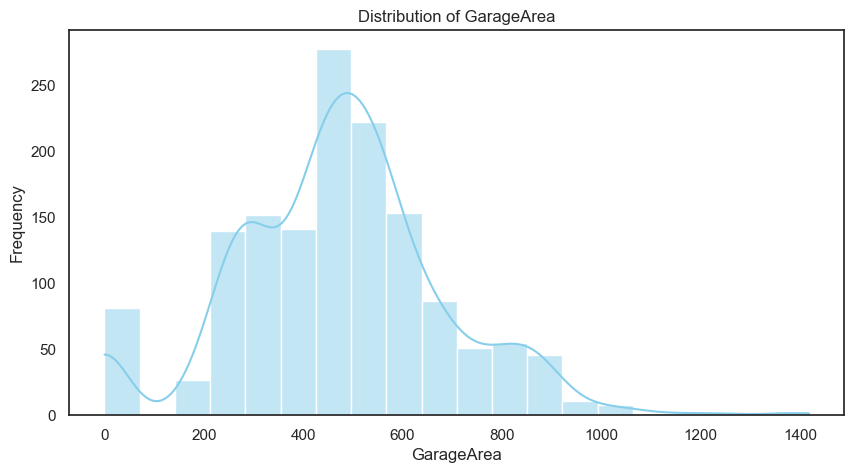

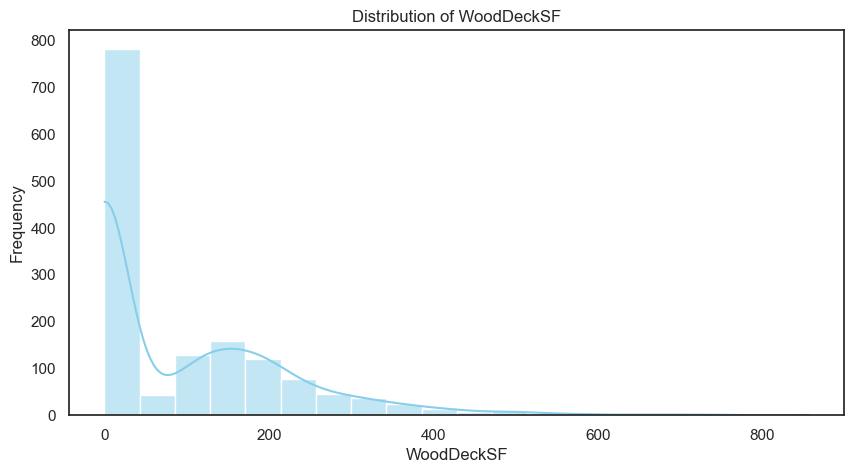

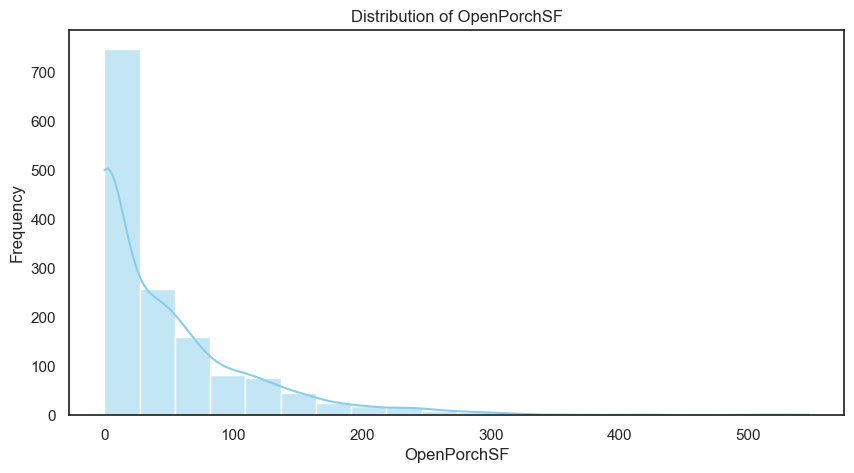

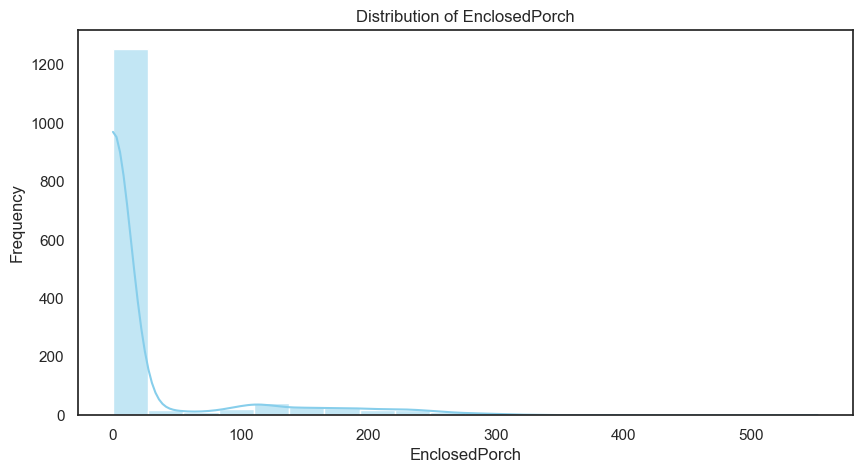

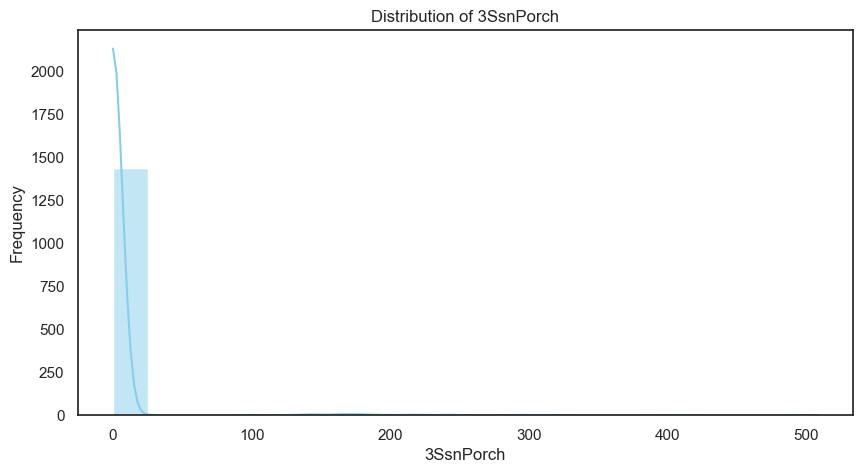

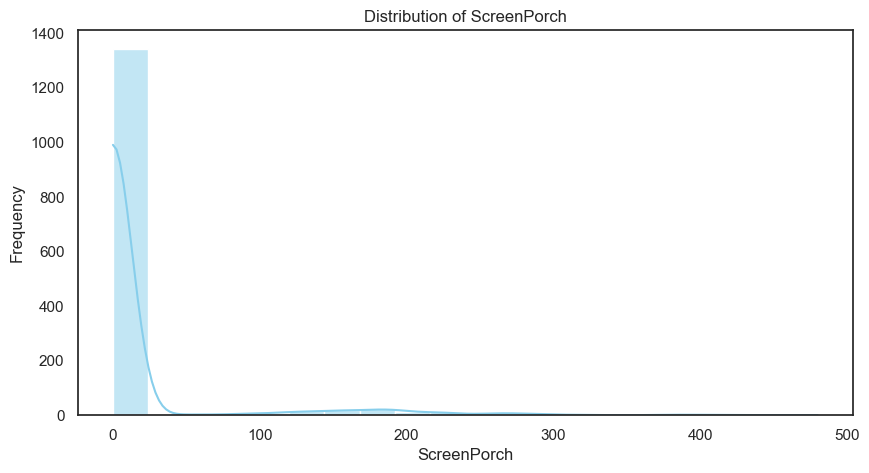

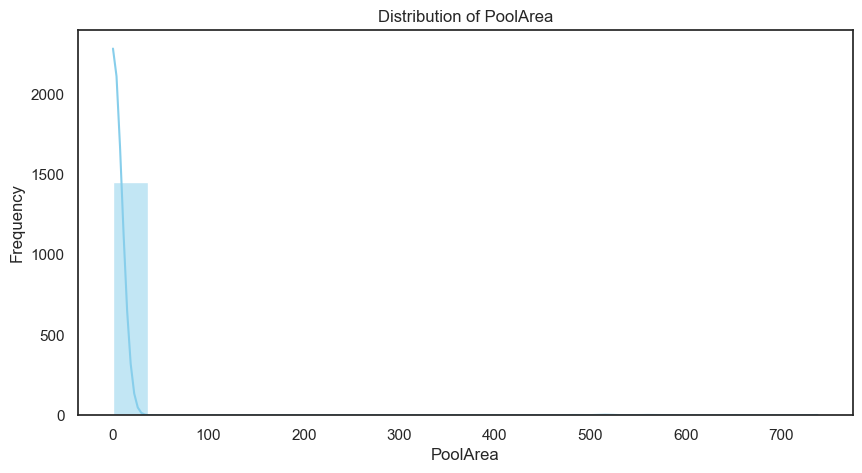

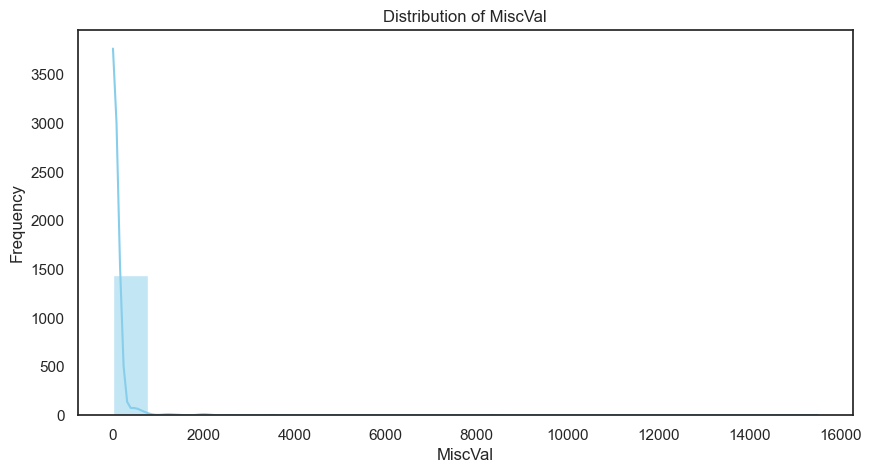

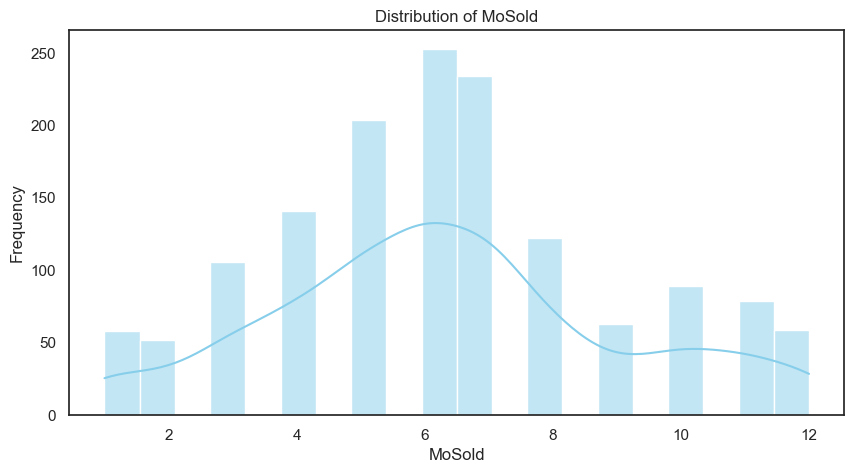

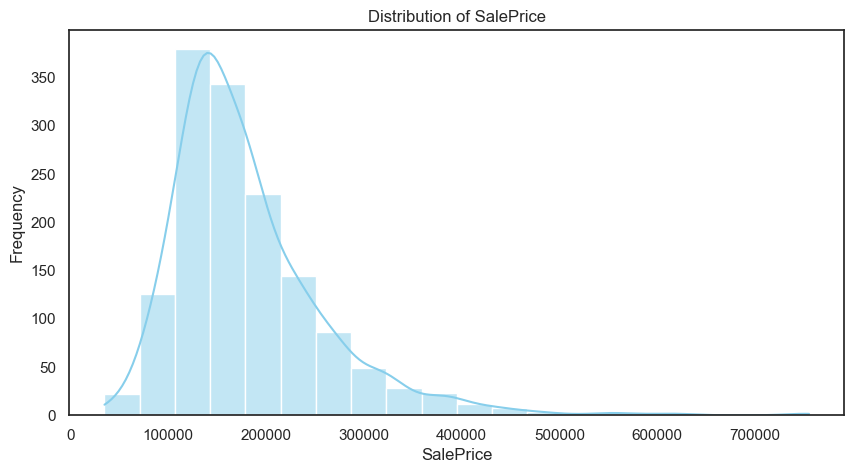

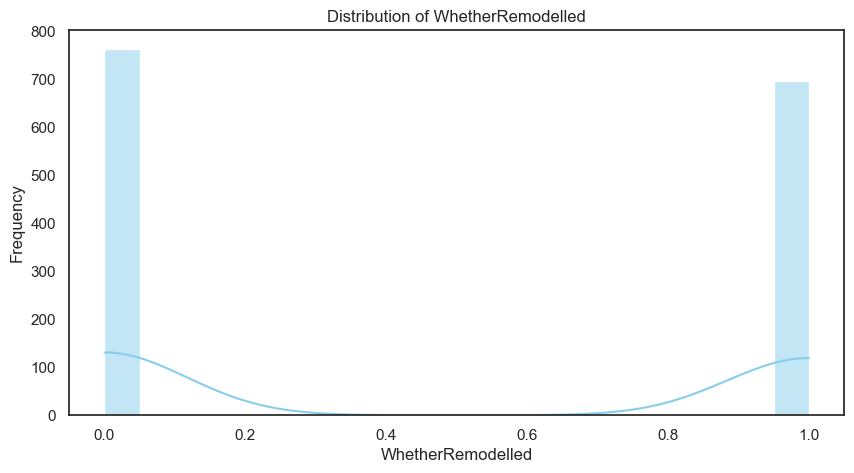

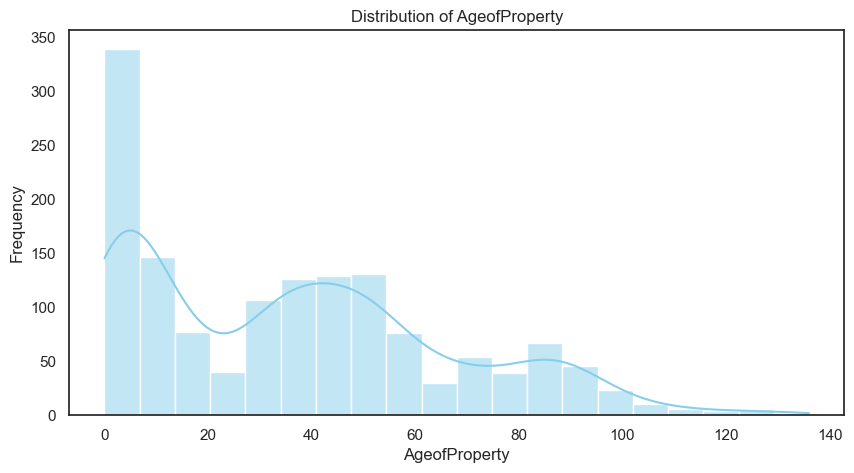

In [618]:
# Plot all numeric variables
def plot_numeric(df, col):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

def plot_numeric_variables(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        plot_numeric(df, col)

# Assuming df is your DataFrame
plot_numeric_variables(df)


### Observation:
- Most of the the Houses were sold in month of June and july
- Most Houses are sold in range of 100 to 150K
- Newly contructed properties % are more
- Most of the gaurare space is between 400 to 500 SqFt

In [619]:
##Removing 'Id' and 'MoSold' columns as they are trivial for our analysis
df = df.drop(['Id','MoSold'], axis=1)

In [620]:
##Check outliers
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.95,0.98,0.99,1]).transpose()

count           mean           std      min       10%  \
MSSubClass         1460.0      56.897260     42.300571     20.0      20.0   
LotFrontage        1460.0      69.863699     22.027677     21.0      49.0   
LotArea            1460.0   10516.828082   9981.264932   1300.0    5000.0   
OverallQual        1460.0       6.099315      1.382997      1.0       5.0   
OverallCond        1460.0       5.575342      1.112799      1.0       5.0   
MasVnrArea         1460.0     104.229452    180.717988      0.0       0.0   
BsmtFinSF1         1460.0     443.639726    456.098091      0.0       0.0   
BsmtFinSF2         1460.0      46.549315    161.319273      0.0       0.0   
BsmtUnfSF          1460.0     567.240411    441.866955      0.0      74.9   
TotalBsmtSF        1460.0    1057.429452    438.705324      0.0     636.9   
1stFlrSF           1460.0    1162.626712    386.587738    334.0     756.9   
2ndFlrSF           1460.0     346.992466    436.528436      0.0       0.0   
LowQualFinSF       1460.0       5.844521     48.623081      0.0       0.0   
GrLivArea          1460.0    1515.463699    525.480383    334.0     912.0   
BsmtFullBath       1460.0       0.425342      0.518911      0.0       0.0   
BsmtHalfBath       1460.0       0.057534      0.238753      0.0       0.0   
FullBath           1460.0       1.565068      0.550916      0.0       1.0   
HalfBath           1460.0       0.382877      0.502885      0.0       0.0   
BedroomAbvGr       1460.0       2.866438      0.815778      0.0       2.0   
KitchenAbvGr       1460.0       1.046575      0.220338      0.0       1.0   
TotRmsAbvGrd       1460.0       6.517808      1.625393      2.0       5.0   
Fireplaces         1460.0       0.613014      0.644666      0.0       0.0   
GarageYrBlt        1460.0    1868.739726    453.697295      0.0    1928.0   
GarageCars         1460.0       1.767123      0.747315      0.0       1.0   
GarageArea         1460.0     472.980137    213.804841      0.0     240.0   
WoodDeckSF         1460.0      94.244521    125.338794      0.0       0.0   
OpenPorchSF        1460.0      46.660274     66.256028      0.0       0.0   
EnclosedPorch      1460.0      21.954110     61.119149      0.0       0.0   
3SsnPorch          1460.0       3.409589     29.317331      0.0       0.0   
ScreenPorch        1460.0      15.060959     55.757415      0.0       0.0   
PoolArea           1460.0       2.758904     40.177307      0.0       0.0   
MiscVal            1460.0      43.489041    496.123024      0.0       0.0   
SalePrice          1460.0  180921.195890  79442.502883  34900.0  106475.0   
WhetherRemodelled  1460.0       0.476712      0.499629      0.0       0.0   
AgeofProperty      1460.0      36.547945     30.250152      0.0       1.0   

                         25%       50%        75%        95%        98%  \
MSSubClass             20.00      50.0      70.00     160.00     188.20   
LotFrontage            60.00      69.0      79.00     104.00     120.82   
LotArea              7553.50    9478.5   11601.50   17401.15   25251.62   
OverallQual             5.00       6.0       7.00       8.00       9.00   
OverallCond             5.00       5.0       6.00       8.00       8.00   
MasVnrArea              0.00       0.0     168.00     456.00     650.82   
BsmtFinSF1              0.00     383.5     712.25    1274.00    1442.64   
BsmtFinSF2              0.00       0.0       0.00     396.20     658.12   
BsmtUnfSF             223.00     477.5     808.00    1468.00    1678.20   
TotalBsmtSF           795.75     991.5    1298.25    1753.00    2001.64   
1stFlrSF              882.00    1087.0    1391.25    1831.25    2072.28   
2ndFlrSF                0.00       0.0     728.00    1141.05    1318.56   
LowQualFinSF            0.00       0.0       0.00       0.00       0.00   
GrLivArea            1129.50    1464.0    1776.75    2466.10    2782.38   
BsmtFullBath            0.00       0.0       1.00       1.00       1.00   
BsmtHalfBath            0.00       0.0       0.

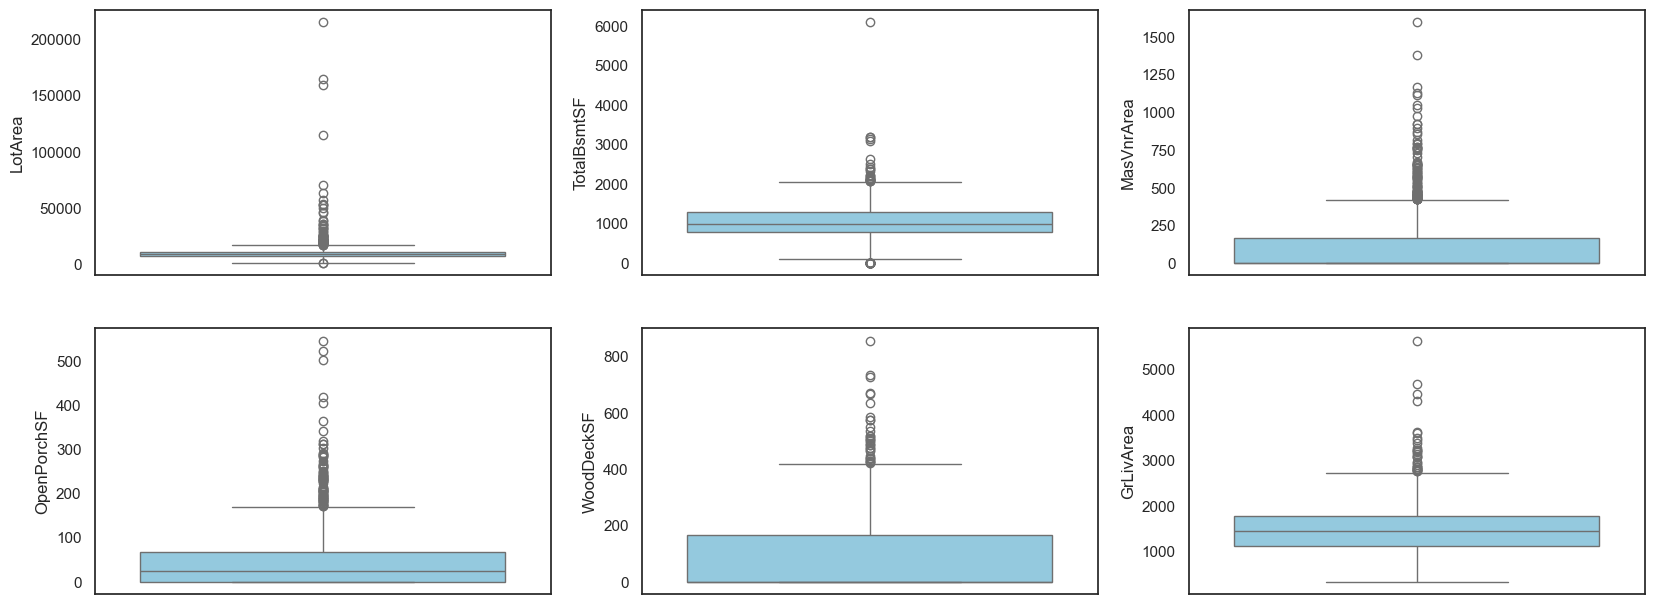

In [621]:
# Check the outliers in all the numeric columns 

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', color='skyblue', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'TotalBsmtSF', color='skyblue', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', color='skyblue', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'OpenPorchSF', color='skyblue', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'WoodDeckSF', color='skyblue', data = df)
plt.subplot(5,3,6)
sns.boxplot(y = 'GrLivArea', color='skyblue', data = df)


plt.show()

In [622]:
df.shape


(1460, 54)

In [623]:
##Removing the Outliers
# Removing values beyond 98% for LotArea

q_LotArea = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < q_LotArea]


# Removing values beyond 99% for TotalBsmtSF
q_TotalBsmtSF = df['TotalBsmtSF'].quantile(0.99)
df = df[df["TotalBsmtSF"] < q_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

q_WoodDeckSF = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < q_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

q_OpenPorchSF = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < q_OpenPorchSF]

## <span style="color:blue"> Step 3: Data Visulization</span>

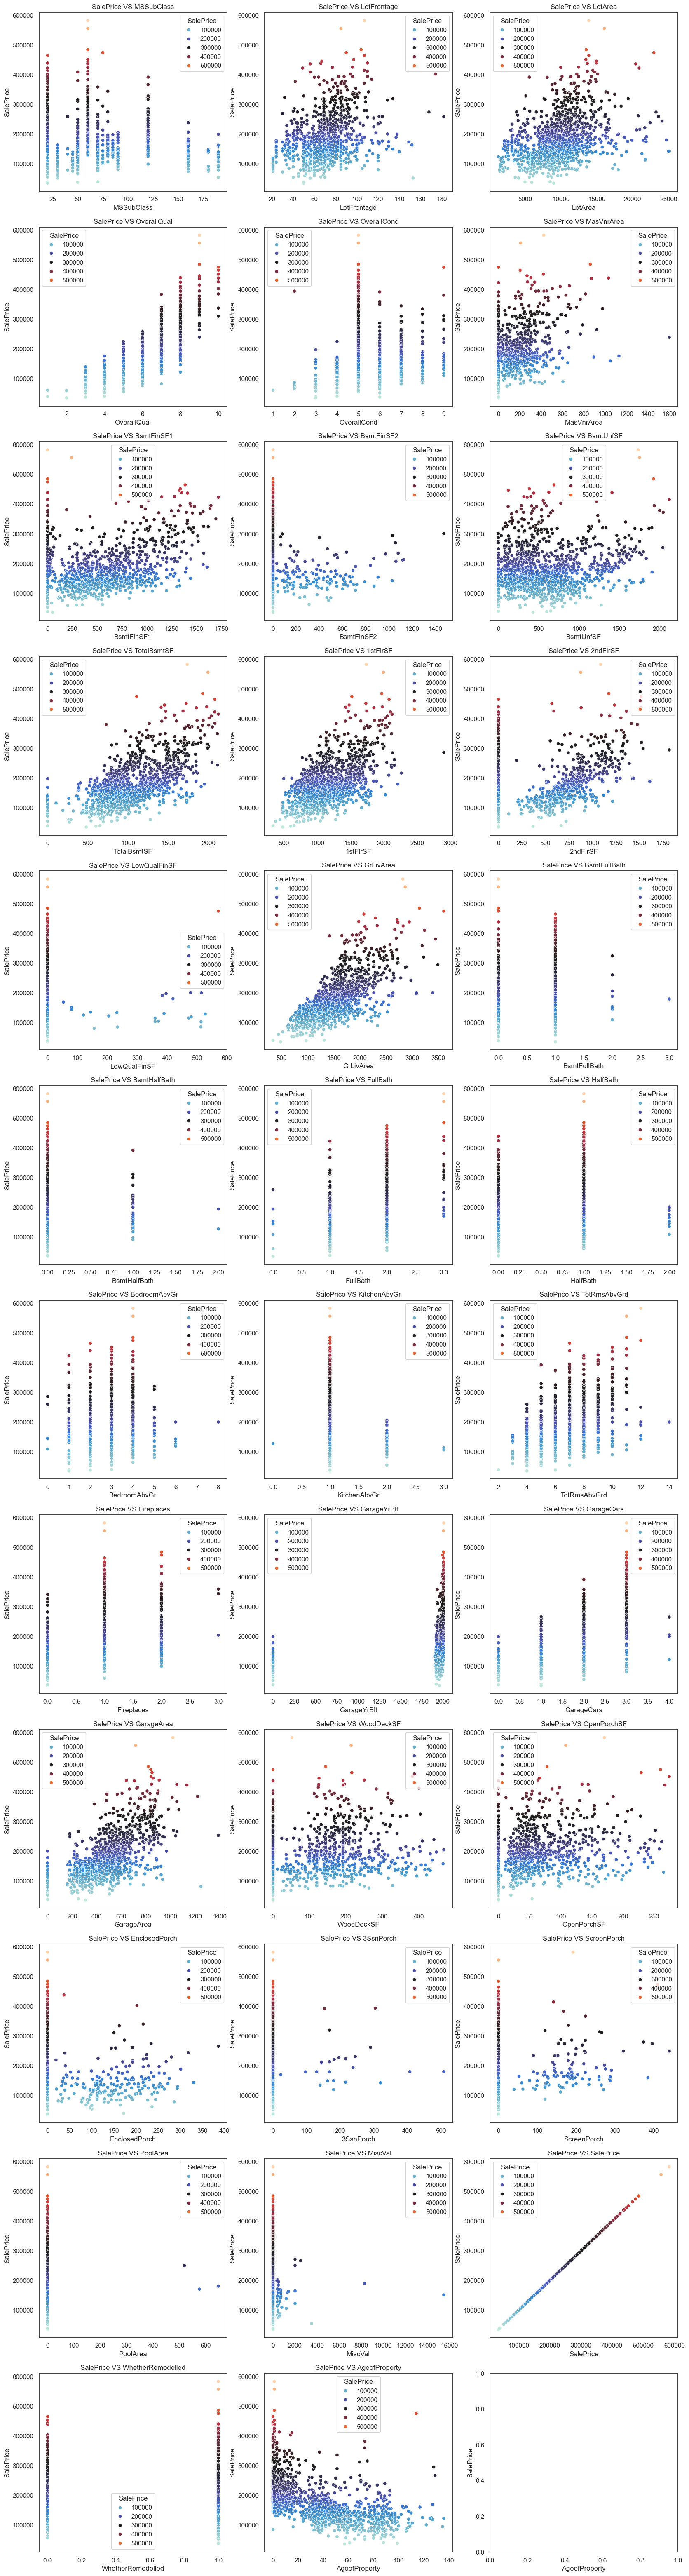

In [624]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

### Observation:
- New properties are costlier than older properties
- GRLiving Area has a direct corelation with the proce of the property.
- Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property
- Month sold has no effect on the price.

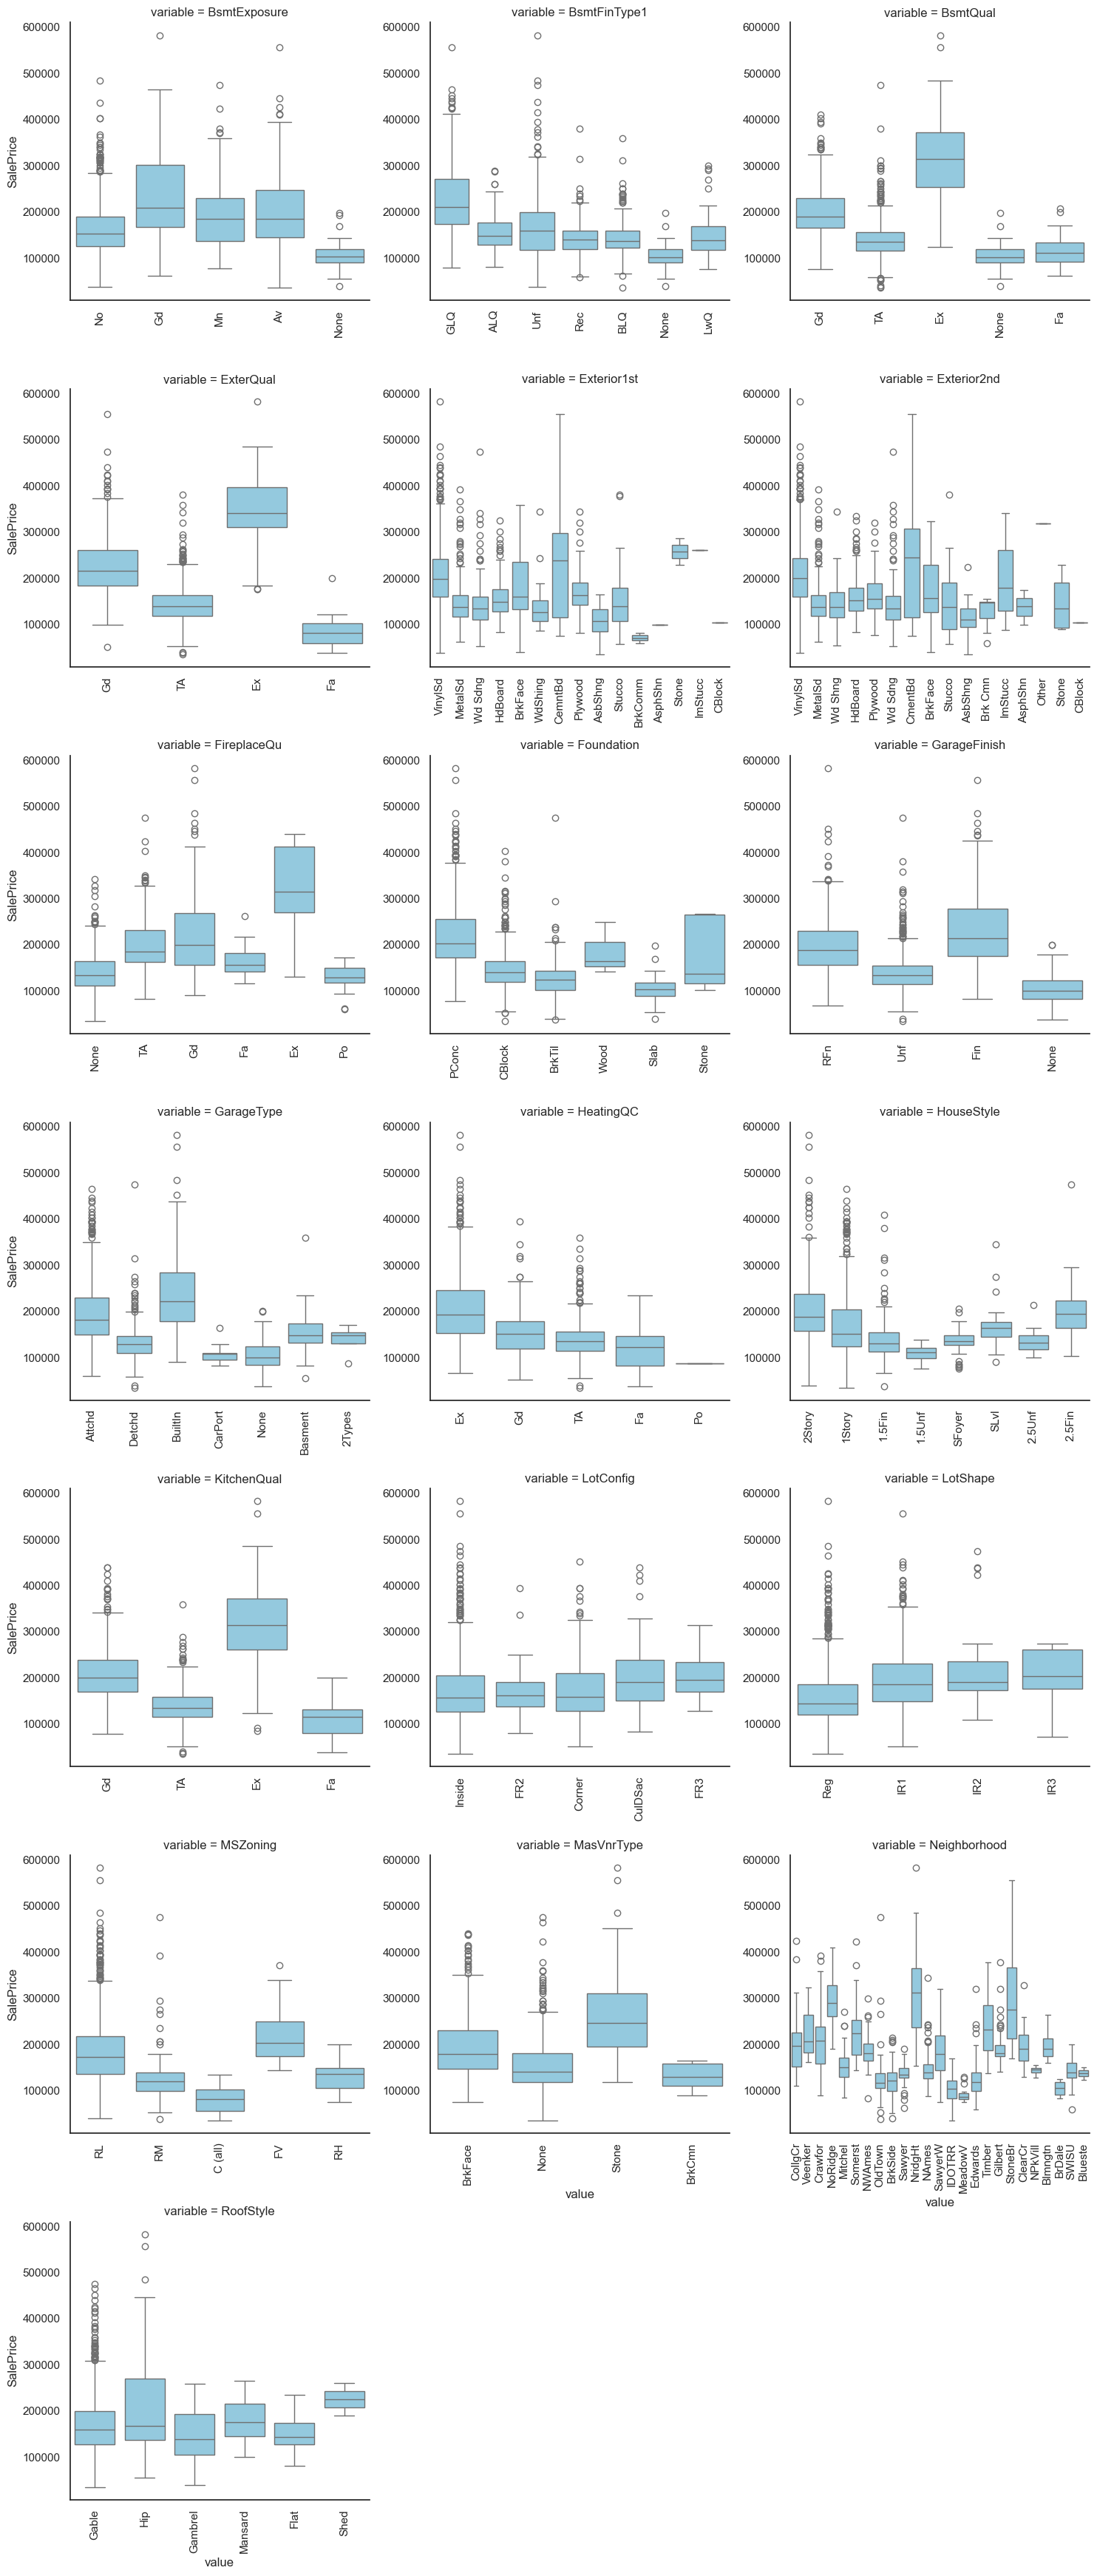

In [625]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y, color='skyblue')  # Corrected color parameter
    plt.xticks(rotation=90)  # Corrected syntax for xticks
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)  # Corrected size parameter
g = g.map(facetgrid_boxplot, "value", "SalePrice")


### Observation:
- There are a few outliers which we handle in the feature engineering section by capping them to a lower percentile. 

From the above box plots we see that
- Paved alleys properties demand a higher price.
- Houses where the basement quality is good and excellent are sold at higher prices compared to others
- Houses with good and excelent garages are sold at higher prices.
- Houses with good quality kitchens also impact the price in a postive way.


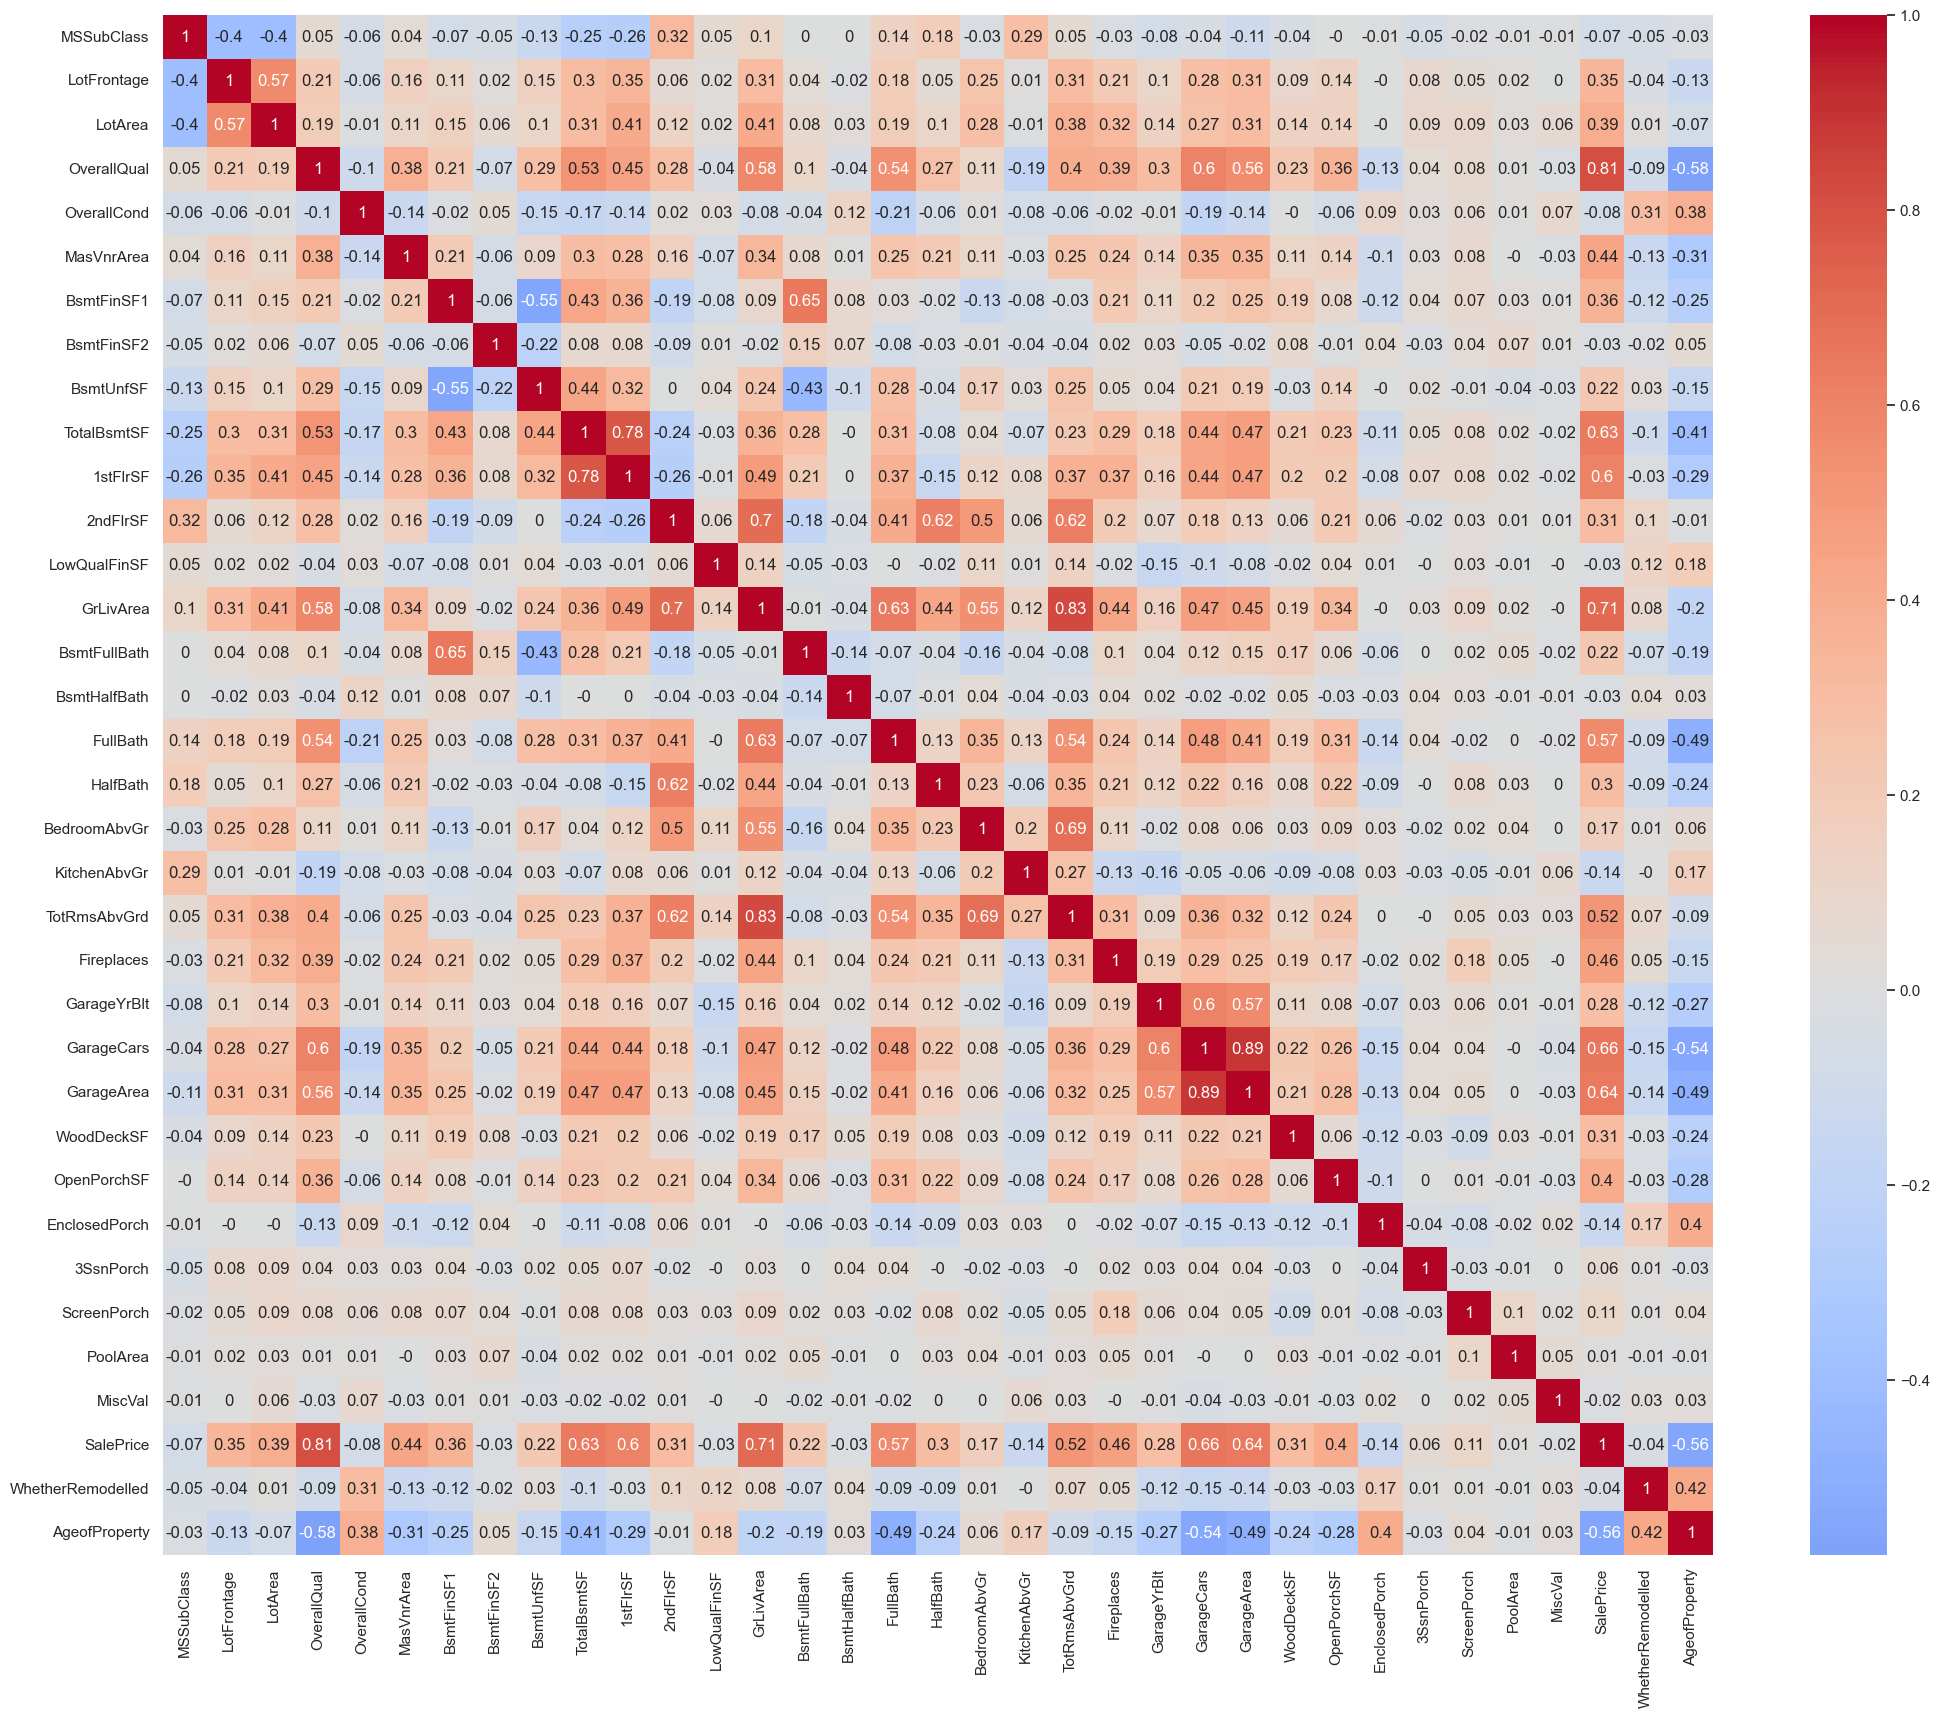

In [626]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

### Observation:
- The predictors GrLivArea and TotRmsAbvGrd shows (0.83) strong positive correlation. Hence, dropping TotRmsAbvGrd
- The predictors GarageCar and GarageArea shows (0.89) strong positive correlation. Hence, dropping GarageCars
- The predictors GrLivArea and 2ndFlrSF shows (0.71) strong positive correlation. Hence, dropping 2ndFlrSF
- The predictors 1stFlrSF and TotalBsmtSF shows (0.77) strong positive correlation. Hence, dropping 1stFlrSF

In [627]:
##Removing the highly correlated predictors to reduce multicollinearity.

df= df.drop(['TotRmsAbvGrd', 'GarageCars', '2ndFlrSF', '1stFlrSF'], axis = 1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure  \
0    BrkFace       196.0        Gd      PConc       Gd           No   
1       None         0.0        TA     CBlock       Gd           Gd   
2    BrkFace       162.0        Gd      PConc       Gd           Mn   
3       None         0.0        TA     BrkTil       TA           No   
4    BrkFace       350.0        Gd      PConc       Gd           Av   

  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0          GLQ         706           0        150          856        Ex   
1          ALQ         978           0        284         1262        Ex   
2          GLQ         486           0        434          920        Ex   
3          ALQ         216           0        540          756        Gd   
4          GLQ         655           0        490         1145        Ex   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  Fireplaces FireplaceQu GarageType  \
0             3             1          Gd           0        None     Attchd   
1             3             1          TA           1          TA     Attchd   
2             3             1          Gd           1          TA     Attchd   
3             3             1          Gd           1          Gd     Detchd   
4             4             1          Gd           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2003          RFn         548           0           61   
1         1976          RFn         460         298            0   
2         2001          RFn         608           0           42   
3         1998          Unf         642           0           35   
4         2000          RFn         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0              0          0            0         0        0     208500   
1              0          0            0         0        0     181500   
2              0          0            0         0        0     223500   
3            272          0            0         0        0     140000   
4              0          0            0         0        0     250000   

   WhetherRemodelled  AgeofProperty  
0                  0              5  
1                  0             31  
2                  1              7  
3                  1             91  
4                  0              8

## <span style="color:blue"> Step 4: Data Preparation</span>

In [628]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

##For ordinals, let's assign them their respective weights.
df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0}) #3 indicates better i.e. Regular LotShape
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })

df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', \
                                'KitchenQual', 'FireplaceQu', 'GarageFinish' ], axis=1)

df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotConfig Neighborhood  \
0          60       RL         65.0     8450    Inside      CollgCr   
1          20       RL         80.0     9600       FR2      Veenker   
2          60       RL         68.0    11250    Inside      CollgCr   
3          70       RL         60.0     9550    Corner      Crawfor   
4          60       RL         84.0    14260       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st Exterior2nd  \
0     2Story            7            5     Gable     VinylSd     VinylSd   
1     1Story            6            8     Gable     MetalSd     MetalSd   
2     2Story            7            5     Gable     VinylSd     VinylSd   
3     2Story            7            5     Gable     Wd Sdng     Wd Shng   
4     2Story            8            5     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0    BrkFace       196.0      PConc         706           0        150   
1       None         0.0     CBlock         978           0        284   
2    BrkFace       162.0      PConc         486           0        434   
3       None         0.0     BrkTil         216           0        540   
4    BrkFace       350.0      PConc         655           0        490   

   TotalBsmtSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          856             0       1710             1             0         2   
1         1262             0       1262             0             1         2   
2          920             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1145             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces GarageType  GarageYrBlt  \
0         1             3             1           0     Attchd         2003   
1         0             3             1           1     Attchd         1976   
2         1             3             1           1     Attchd         2001   
3         0             3             1           1     Detchd         1998   
4         1             4             1           1     Attchd         2000   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  SalePrice  WhetherRemodelled  AgeofProperty  d_LotShape  \
0         0        0     208500                  0              5           3   
1         0        0     181500                  0             31           3   
2         0        0     223500                  1              7           2   
3         0        0     140000                  1             91           2   
4         0        0     250000                  0              8           2   

   d_ExterQual  d_BsmtQual  d_BsmtExposure  d_BsmtFinType1  d_HeatingQC  \
0            4           4               1               6            5   
1            3           4               4               5            5   
2            4           4               2               6            5   
3            3           3               1               5            4   
4            4           4               3               6            5   

   d_KitchenQual  d_FireplaceQu  d_GarageFinish  
0              4              0               2  
1              3              3               2  
2              4              3               2  
3              4              4               1  
4              4              3      

In [629]:
#Creating dummies for nominal variables


##Creating dummies for 'MSSubClass'
d_MSSubClass = pd.get_dummies(df['MSSubClass'], prefix='MSSubClass', drop_first = True)
df = pd.concat([df, d_MSSubClass], axis = 1)

##Creating dummies for 'LotConfigs'
d_LotConfigs = pd.get_dummies(df['LotConfig'], prefix='LotConfig', drop_first = True)
df = pd.concat([df, d_LotConfigs], axis = 1)

##Creating dummies for 'MSZoning'
d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

##Creating dummies for 'Neighborhood'
d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

##Creating dummies for 'Exterior2nd'
d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

##Creating dummies for 'HouseStyle'
d_HouseStyle = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle', drop_first = True)
df = pd.concat([df, d_HouseStyle], axis = 1)

##Creating dummies for 'Foundation'
d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

##Creating dummies for 'MasVnrType'
d_MasVnrType = pd.get_dummies(df['MasVnrType'], prefix='MasVnrTyp', drop_first = True)
df = pd.concat([df, d_MasVnrType], axis = 1)

##Creating dummies for 'RoofStyle'
d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

##Creating dummies for 'Exterior1st'
d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

##Creating dummies for 'GarageType'
d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)


##Dropping columns for which we have created dummies, as we now have new columns derived from these columns
orig_before_dum_cols = ['MSSubClass','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', \
              'GarageType',  'LotConfig' ,'HouseStyle', 'MasVnrType']
df = df.drop(orig_before_dum_cols, axis=1)

In [630]:
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           0        150          856             0       1710             1   
1           0        284         1262             0       1262             0   
2           0        434          920             0       1786             1   
3           0        540          756             0       1717             1   
4           0        490         1145             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  \
0             0         2         1             3             1           0   
1             1         2         0             3             1           1   
2             0         2         1             3             1           1   
3             0         1         0             3             1           1   
4             0         2         1             4             1           1   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         2003         548           0           61              0          0   
1         1976         460         298            0              0          0   
2         2001         608           0           42              0          0   
3         1998         642           0           35            272          0   
4         2000         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  SalePrice  WhetherRemodelled  \
0            0         0        0     208500                  0   
1            0         0        0     181500                  0   
2            0         0        0     223500                  1   
3            0         0        0     140000                  1   
4            0         0        0     250000                  0   

   AgeofProperty  d_LotShape  d_ExterQual  d_BsmtQual  d_BsmtExposure  \
0              5           3            4           4               1   
1             31           3            3           4               4   
2              7           2            4           4               2   
3             91           2            3           3               1   
4              8           2            4           4               3   

   d_BsmtFinType1  d_HeatingQC  d_KitchenQual  d_FireplaceQu  d_GarageFinish  \
0               6            5              4              0               2   
1               5            5              3              3               2   
2               6            5              4              3               2   
3               5            4              4              4               1   
4               6            5              4              3               2   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0       

In [631]:
## Rechecking and eliminating those predictor variables that have a correlation of (threshold:-0.8 to 0.8) with other predictors.

df_corr = df.drop(['SalePrice'], axis=1)
my_corr_matrix = df_corr.corr().abs()
my_corr_matrix

upper_triangle = my_corr_matrix.where(np.triu(np.ones(my_corr_matrix.shape), k=1).astype(bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.8)]  # Reduces multicollinearity (if any)
col_to_drop  # Columns to drop from df. Independent predictors highly correlated to each other


['d_FireplaceQu',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1.5Unf',
 'HouseStyle_SLvl',
 'MasVnrTyp_None',
 'RoofStyle_Hip',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'GarageType_None']

In [632]:
##Dropping independent predictors highly correlated to each other
df = df.drop(col_to_drop, axis=1)

In [633]:
#Recheck Model 
df.shape

(1386, 126)

In [634]:
##Creating a copy of this dataframe 
df_new1 = df.copy()

In [635]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)
print(binary_cols)

['WhetherRemodelled', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Ext

## <span style="color:blue"> Step 5: Train Test Split</span>

In [636]:
##split into train and test

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [637]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

all_cols = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [638]:
print(df_train.shape)
print(df_test.shape)

(970, 126)
(416, 126)


In [639]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [640]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

## <span style="color:blue"> Step 6: Recursive Feature Elimination</span>

In [641]:
# Since there are around 117 features, we will use RFE to get the best 50 features 

In [642]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [643]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
sorted_zip = sorted(my_zip, key=lambda x: x[2])

# Print the sorted list
for item in sorted_zip:
    print(item)

('LotArea', True, 1)
('OverallQual', True, 1)
('OverallCond', True, 1)
('MasVnrArea', True, 1)
('BsmtFinSF1', True, 1)
('BsmtFinSF2', True, 1)
('TotalBsmtSF', True, 1)
('GrLivArea', True, 1)
('BedroomAbvGr', True, 1)
('GarageYrBlt', True, 1)
('GarageArea', True, 1)
('AgeofProperty', True, 1)
('d_ExterQual', True, 1)
('d_KitchenQual', True, 1)
('MSSubClass_70', True, 1)
('MSSubClass_75', True, 1)
('MSSubClass_90', True, 1)
('MSSubClass_120', True, 1)
('MSSubClass_160', True, 1)
('Neighborhood_Blueste', True, 1)
('Neighborhood_BrDale', True, 1)
('Neighborhood_BrkSide', True, 1)
('Neighborhood_Crawfor', True, 1)
('Neighborhood_NPkVill', True, 1)
('Neighborhood_NoRidge', True, 1)
('Neighborhood_NridgHt', True, 1)
('Neighborhood_StoneBr', True, 1)
('Neighborhood_Timber', True, 1)
('Neighborhood_Veenker', True, 1)
('Exterior2nd_AsphShn', True, 1)
('Exterior2nd_CmentBd', True, 1)
('Exterior2nd_MetalSd', True, 1)
('Exterior2nd_Stone', True, 1)
('Exterior2nd_Wd Sdng', True, 1)
('Exterior2nd_Wd 

In [644]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'GarageYrBlt',
       'GarageArea', 'AgeofProperty', 'd_ExterQual', 'd_KitchenQual',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Exterior2nd_AsphShn',
       'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_Stone',
       'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'Foundation_PConc', 'Foundation_Wood',
       'MasVnrTyp_BrkFace', 'MasVnrTyp_Stone', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc',
       'Exterior1st_WdShing', 

In [645]:
##Creating a dataframe for RFE supported top 50 indepedent variables. Assign the 50 features selected using RFE to a dataframe and view them

top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking'])
top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)
top50_df

Features  rfe_support  rfe_ranking
0                LotArea         True            1
1            OverallQual         True            1
2            OverallCond         True            1
3             MasVnrArea         True            1
4             BsmtFinSF1         True            1
5             BsmtFinSF2         True            1
6            TotalBsmtSF         True            1
7              GrLivArea         True            1
8           BedroomAbvGr         True            1
9            GarageYrBlt         True            1
10            GarageArea         True            1
11         AgeofProperty         True            1
12           d_ExterQual         True            1
13         d_KitchenQual         True            1
14         MSSubClass_70         True            1
15         MSSubClass_75         True            1
16         MSSubClass_90         True            1
17        MSSubClass_120         True            1
18        MSSubClass_160         True            1
19  Neighborhood_Blueste         True            1
20   Neighborhood_BrDale         True            1
21  Neighborhood_BrkSide         True            1
22  Neighborhood_Crawfor         True            1
23  Neighborhood_NPkVill         True            1
24  Neighborhood_NoRidge         True            1
25  Neighborhood_NridgHt         True            1
26  Neighborhood_StoneBr         True            1
27   Neighborhood_Timber         True            1
28  Neighborhood_Veenker         True            1
29   Exterior2nd_AsphShn         True            1
30   Exterior2nd_CmentBd         True            1
31   Exterior2nd_MetalSd         True            1
32     Exterior2nd_Stone         True            1
33   Exterior2nd_Wd Sdng         True            1
34   Exterior2nd_Wd Shng         True            1
35     HouseStyle_2.5Fin         True            1
36     HouseStyle_2.5Unf         True            1
37      Foundation_PConc         True            1
38       Foundation_Wood         True            1
39     MasVnrTyp_BrkFace         True            1
40       MasVnrTyp_Stone         True            1
41   Exterior1st_AsphShn         True            1
42   Exterior1st_BrkComm         True            1
43   Exterior1st_BrkFace         True            1
44   Exterior1st_ImStucc         True            1
45   Exterior1st_WdShing         True            1
46     GarageType_Attchd         True            1
47    GarageType_Basment         True            1
48    GarageType_BuiltIn         True            1
49     GarageType_Detchd         True            1

In [646]:
##Let's Assign top 50 columns to X_train_rfe

X_train_rfe = X_train[col_rfe_sup]

In [647]:
##Making sure that we have only 50 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

## <span style="color:blue"> Step 7: Model Building and Evaluation</span>

## Ridge Regression

In [648]:
## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15,
                                   16, 17, 18, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [649]:
##Display Mean Scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
15         4.0         -0.215182        -0.229650                1
14         3.0         -0.214562        -0.229687                2
16         5.0         -0.215813        -0.229878                3
13         2.0         -0.214058        -0.229882                4
17         6.0         -0.216427        -0.230144                5
18         7.0         -0.217034        -0.230439                6
12         1.0         -0.213757        -0.230580                7
11         0.9         -0.213739        -0.230691                8
19         8.0         -0.217637        -0.230766                9
10         0.8         -0.213725        -0.230817               10
9          0.7         -0.213716        -0.230974               11
20         9.0         -0.218218        -0.231112               12
8          0.6         -0.213711        -0.231141               13
7          0.5         -0.213708        -0.231318               14
21        10.0         -0.218798        -0.231435               15
6          0.4         -0.213701        -0.231516               16
5          0.3         -0.213696        -0.231735               17
22          11         -0.219357        -0.231740               18
4          0.2         -0.213692        -0.231976               19
23          12         -0.219893        -0.232028               20
3          0.1         -0.213680        -0.232268               21
24          13         -0.220419        -0.232331               22
25          14         -0.220917        -0.232624               23
2         0.01         -0.213654        -0.232664               24
1        0.001         -0.213649        -0.232710               25
0       0.0001         -0.213649        -0.232714               26
26          15         -0.221394        -0.232893               27
27          16         -0.221845        -0.233139               28
28          17         -0.222280        -0.233381               29
29          18         -0.222701        -0.233627               30
30          19         -0.223113        -0.233897               31
31          20         -0.223511        -0.234150               32
32          50         -0.230864        -0.238809               33
33         100         -0.236559        -0.242917               34
34         500         -0.257076        -0.260700               35
35        1000         -0.284112        -0.286554               36

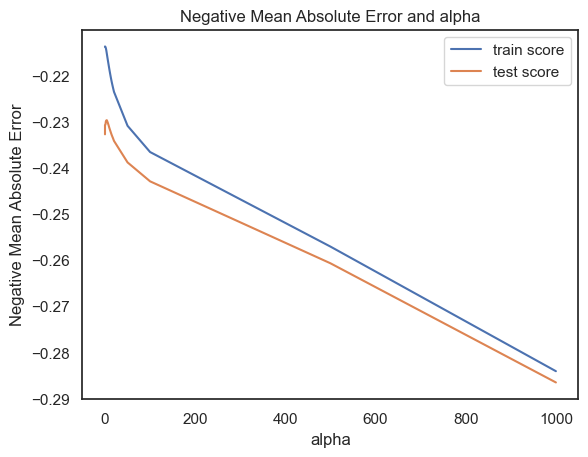

In [650]:
##Plot mean test and train scores with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [651]:
##Finding the best estimator for alpha (lambda parameter)
ridge_model_cv.best_estimator_

Ridge(alpha=4.0)

In [652]:
##Checking the coefficient values with lambda (alpha) = 8

ridge = Ridge(alpha=4.0)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.12037147381868579
Coefficients:
 [ 0.07579301  0.17902898  0.0719767   0.07404704  0.11313528  0.01719791
  0.10703972  0.34417436 -0.05843714 -0.04879999  0.09566356 -0.1963518
  0.06069115  0.05801701  0.05760886  0.05607687 -0.20169836 -0.27097369
 -0.30917856  0.05789275  0.07857471  0.22132449  0.36402287  0.20987758
  0.14883382  0.3667256   0.49574664  0.06112566  0.18442762 -0.02772897
  0.15264861  0.06093949  0.13202998  0.04932604 -0.1194036  -0.08929057
 -0.04687469  0.09909747 -0.15370932 -0.07943148  0.13844622  0.00331867
 -0.14424575  0.25691432 -0.04258571  0.09457292  0.0315697   0.00988599
  0.19414618  0.03642277]


### Model Prediction and Evaluation Metrics

In [653]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Original Model, alpha=4):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Original Model, alpha=4):
 ****************************************

For Train Set:
R2 score: 0.9003303461446619 
MSE score: 0.0996696538553381 
MAE score: 0.21555629481553829 
RMSE score: 0.3157050108175955

For Test Set:
R2 score: 0.8903521814311881 
MSE score: 0.10188349080520141 
MAE score: 0.2272083571214824 
RMSE score: 0.3191919341167653 
 ****************************************


In [654]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0  Neighborhood_StoneBr       0.4957                            0.4957
1  Neighborhood_NridgHt       0.3667                            0.3667
2  Neighborhood_Crawfor       0.3640                            0.3640
3             GrLivArea       0.3442                            0.3442
4        MSSubClass_160      -0.3092                            0.3092
5        MSSubClass_120      -0.2710                            0.2710
6   Exterior1st_BrkFace       0.2569                            0.2569
7  Neighborhood_BrkSide       0.2213                            0.2213
8  Neighborhood_NPkVill       0.2099                            0.2099
9         MSSubClass_90      -0.2017                            0.2017

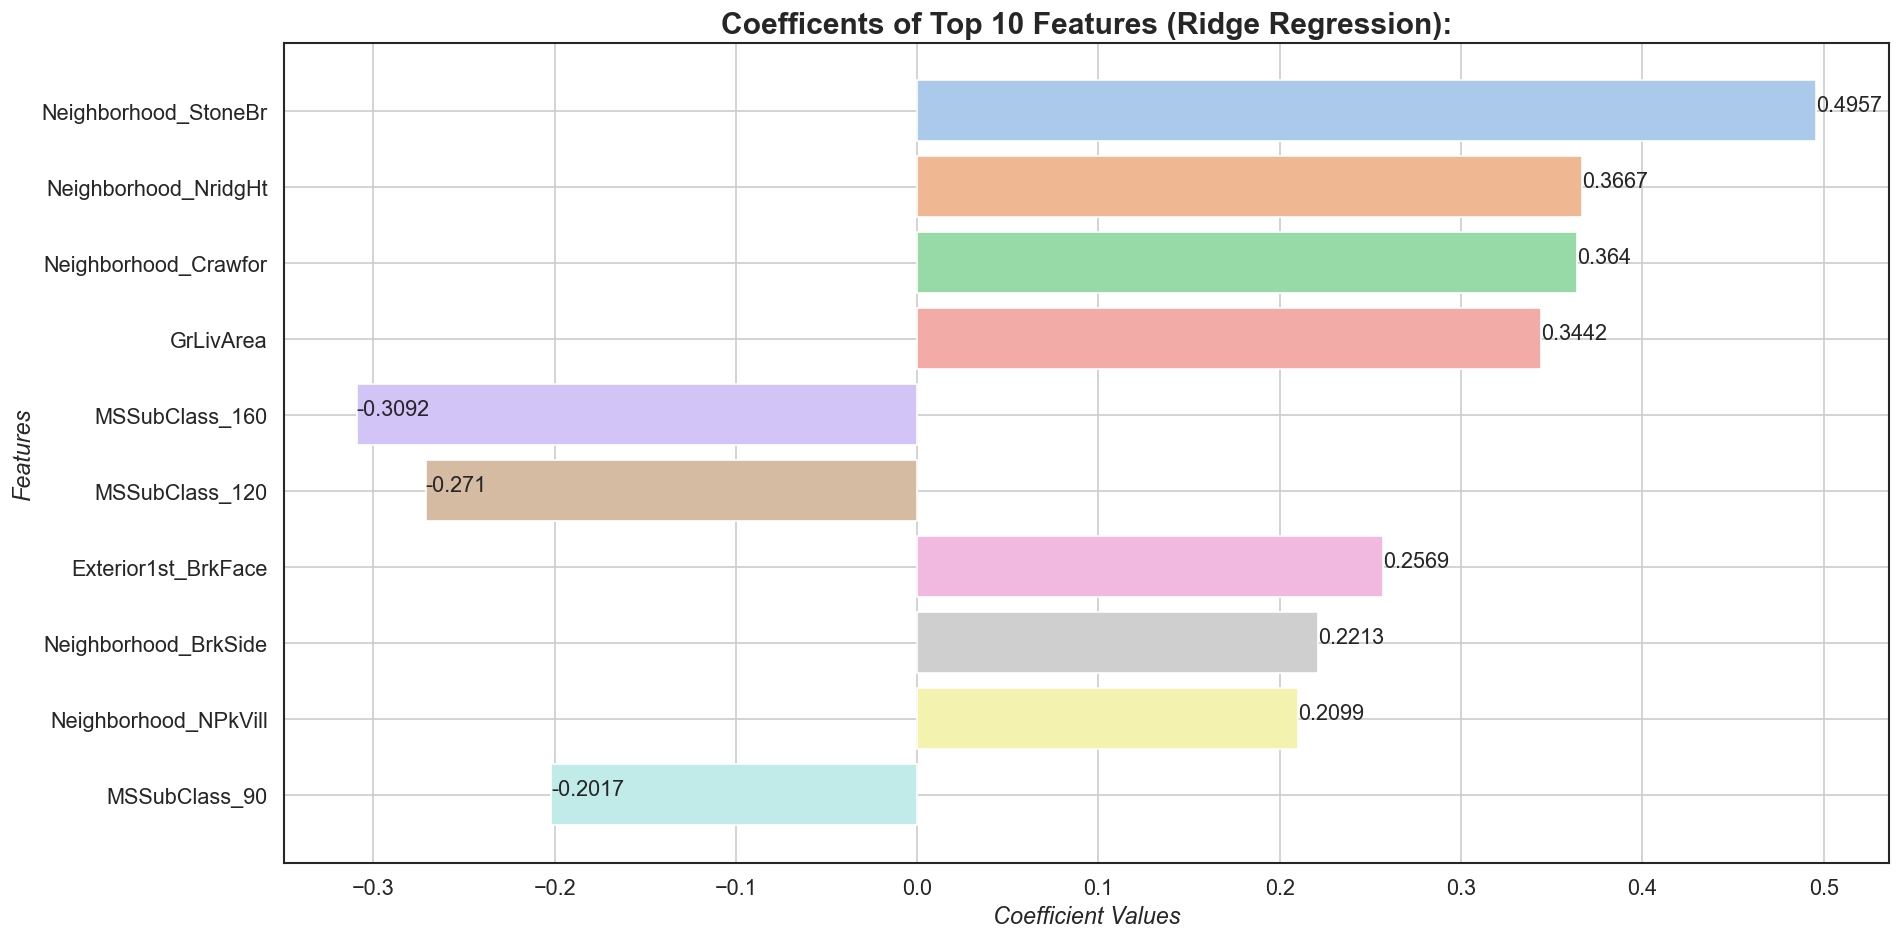

In [655]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df = ridge_df.loc[:9] # Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16, 8), dpi=120)
ax3 = sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='pastel')  # Use a pastel color palette

plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=18, fontweight='bold')

coef = top10_ridge_df['Coefficient'] # Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


In [656]:
print("For Ridge Regression ( alpha model, alpha=4): \n","*"*125)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_df['Features']),"\n", "*"*125)

For Ridge Regression ( alpha model, alpha=4): 
 *****************************************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor', 'GrLivArea', 'MSSubClass_160', 'MSSubClass_120', 'Exterior1st_BrkFace', 'Neighborhood_BrkSide', 'Neighborhood_NPkVill', 'MSSubClass_90'] 
 *****************************************************************************************************************************


The chart mentioned above displays the Top 10 predictors based on the Ridge Regression model, that are significant in predicting the sale price of the house

### Residual Analysis of Model



In [657]:
# Checking for the error terms distribution. 
# They should be normally distributed (as it is one of the major assumptions of linear regression).

#### For Train Set

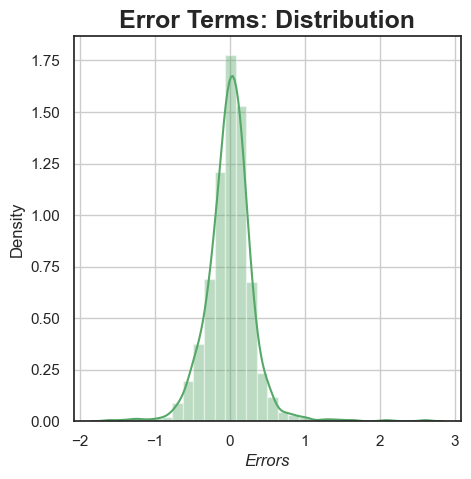

In [658]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_train - y_pred_train_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

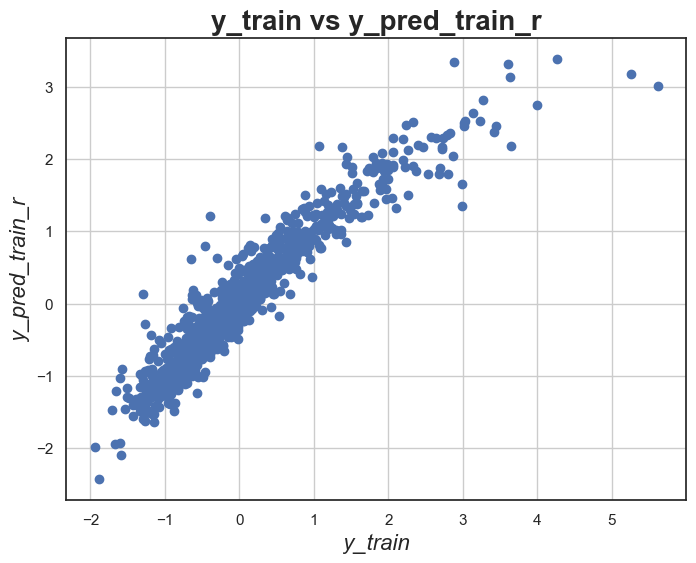

In [659]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_r)
plt.title('y_train vs y_pred_train_r', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_r', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

In [660]:
y_train.shape

(970,)

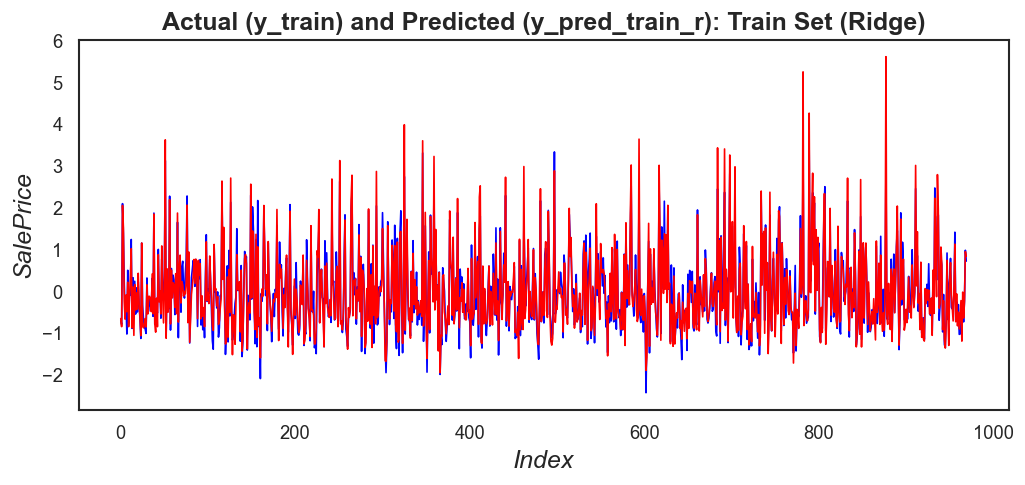

In [661]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize=(10, 4), dpi=120)

# Use the minimum length of the two arrays
length = min(len(y_pred_train_r), len(y_train))

# Create index arrays with the correct length
f = [i for i in range(length)]
g = [i for i in range(length)]

# Plot the first `length` elements of y_pred_train_r and y_train
plt.plot(f, y_pred_train_r[:length], color="blue", linewidth=1, linestyle="-")  # Predicted 'y_pred_train_r' plot
plt.plot(g, y_train[:length], color="red", linewidth=1, linestyle="-")  # Actual 'y_train' plot

plt.title("Actual (y_train) and Predicted (y_pred_train_r): Train Set (Ridge)", fontsize=15, fontweight='bold')
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')
plt.show()


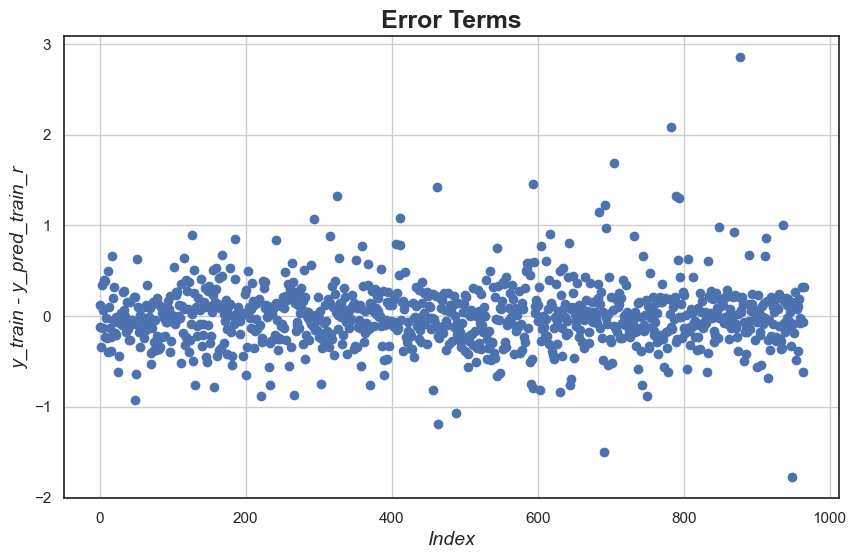

In [662]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize=(10, 6), dpi=100)

# Use the minimum length of j and res_train arrays
length = min(len(j), len(res_train))

# Create index array j with the correct length
j = [i for i in range(length)]

# Plot the first `length` elements of res_train against j
plt.scatter(j, res_train[:length])

plt.title('Error Terms', fontsize=18, fontweight='bold')
plt.xlabel('Index', fontstyle='italic', fontsize=14)
plt.ylabel('y_train - y_pred_train_r', fontstyle='italic', fontsize=14)
plt.grid(True)
plt.show()


The residuals are scattered along (y=0) and are independent of each othe

#### For Test Set:

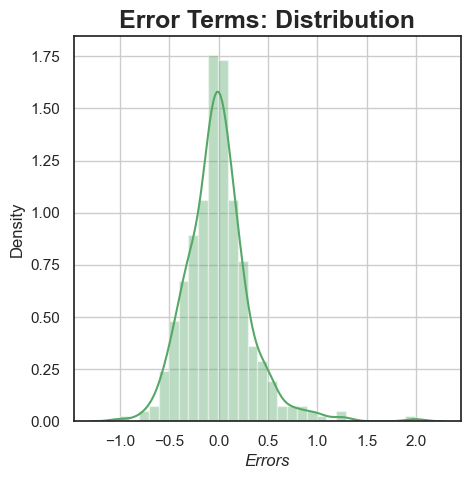

In [663]:
# Plot the histogram of the error terms (test set)
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res = (y_test - y_pred_test_r)     #residuals
sns.distplot(res , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

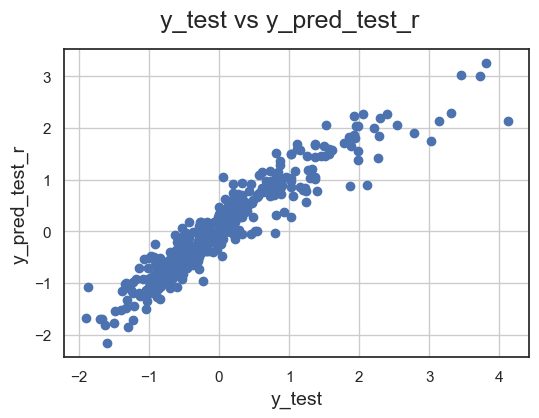

In [664]:
# Plotting y_test and y_pred_test_r to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_r)
fig.suptitle('y_test vs y_pred_test_r', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_r', fontsize=14)  
plt.grid(True)
plt.show()

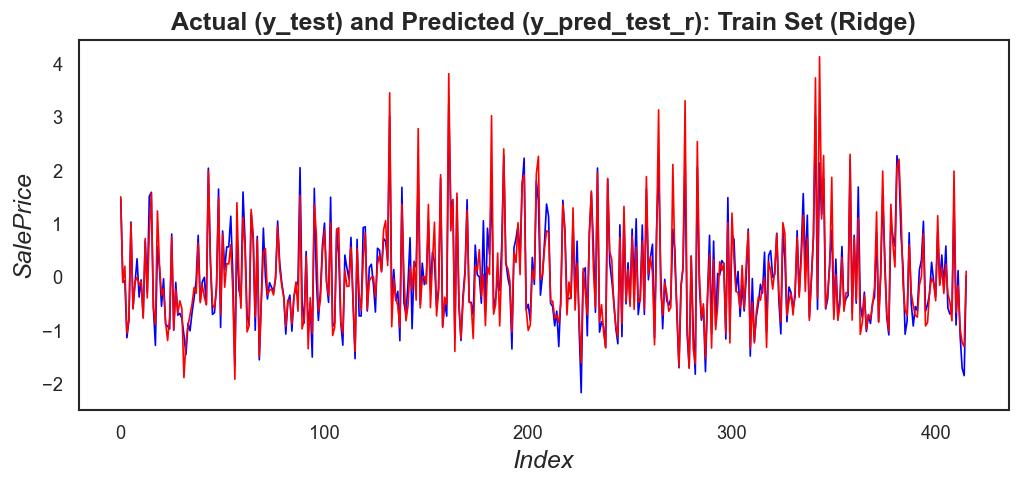

In [665]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize=(10, 4), dpi=120)

# Use the minimum length of the two arrays
length = min(len(y_pred_test_r), len(y_test))

# Create index arrays with the correct length
f = [i for i in range(length)]
g = [i for i in range(length)]

# Plot the first `length` elements of y_pred_train_r and y_train
plt.plot(f, y_pred_test_r[:length], color="blue", linewidth=1, linestyle="-")  # Predicted 'y_pred_train_r' plot
plt.plot(g, y_test[:length], color="red", linewidth=1, linestyle="-")  # Actual 'y_train' plot

plt.title("Actual (y_test) and Predicted (y_pred_test_r): Train Set (Ridge)", fontsize=15, fontweight='bold')
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')
plt.show()


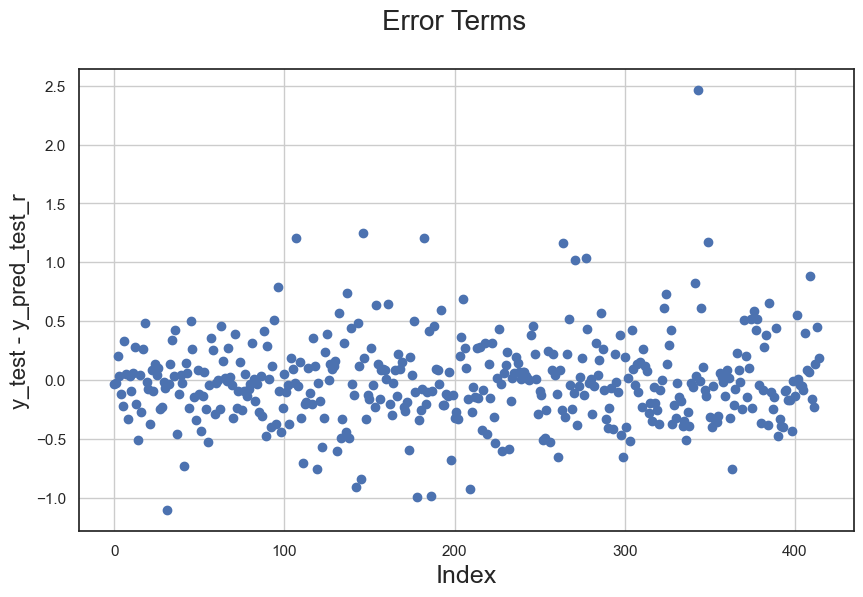

In [666]:
# Error terms
fig = plt.figure(figsize=(10, 6), dpi=100)

# Use the minimum length of o and res_test arrays
length = min(len(o), len(res_test))

# Create index array o with the correct length
o = [i for i in range(length)]

# Plot the first `length` elements of res_test against o
plt.scatter(o, res_test[:length])

fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('y_test - y_pred_test_r', fontsize=16)
plt.grid(True)
plt.show()


The residuals are scattered along (y=0) and are independent of each other.

### Lasso Regression:

In [667]:
##Lasso Regression Model. 
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [ 0.0001, 0.0002, 0.0003, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.002,0.003,0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 39 candidates, totalling 195 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003,
                                   0.004, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [668]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
8        0.001         -0.215650        -0.230863                1
7       0.0009         -0.215321        -0.230898                2
6       0.0008         -0.214963        -0.230918                3
5       0.0007         -0.214661        -0.230967                4
4       0.0006         -0.214400        -0.231062                5
3       0.0005         -0.214246        -0.231122                6
2       0.0003         -0.213943        -0.231325                7
9        0.002         -0.218627        -0.231601                8
1       0.0002         -0.213753        -0.231679                9
0       0.0001         -0.213698        -0.232167               10
10       0.003         -0.221396        -0.233855               11
11       0.004         -0.224215        -0.236529               12
12       0.005         -0.227811        -0.239902               13
13        0.01         -0.243395        -0.251733               14
14        0.05         -0.260000        -0.262723               15
15         0.1         -0.272992        -0.276465               16
16         0.2         -0.325204        -0.328977               17
17         0.3         -0.390895        -0.395237               18
18         0.4         -0.472384        -0.476844               19
19         0.5         -0.549719        -0.552687               20
20         0.6         -0.621185        -0.623554               21
21         0.7         -0.683835        -0.685592               22
22         0.8         -0.737126        -0.737892               23
36         100         -0.743402        -0.743798               24
35          50         -0.743402        -0.743798               24
34          20         -0.743402        -0.743798               24
33        10.0         -0.743402        -0.743798               24
32         9.0         -0.743402        -0.743798               24
31         8.0         -0.743402        -0.743798               24
30         7.0         -0.743402        -0.743798               24
29         6.0         -0.743402        -0.743798               24
28         5.0         -0.743402        -0.743798               24
27         4.0         -0.743402        -0.743798               24
26         3.0         -0.743402        -0.743798               24
25         2.0         -0.743402        -0.743798               24
24         1.0         -0.743402        -0.743798               24
23         0.9         -0.743402        -0.743798               24
37         500         -0.743402        -0.743798               24
38        1000         -0.743402        -0.743798               24

In [669]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.002, 0.003, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [670]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


param_alpha  mean_train_score  mean_test_score  rank_test_score
10       0.001         -0.215650        -0.230863                1
9       0.0009         -0.215321        -0.230898                2
8       0.0008         -0.214963        -0.230918                3
7       0.0007         -0.214661        -0.230967                4
6       0.0006         -0.214400        -0.231062                5
5       0.0005         -0.214246        -0.231122                6
4       0.0004         -0.214130        -0.231214                7
3       0.0003         -0.213943        -0.231325                8
11       0.002         -0.218627        -0.231601                9
2       0.0002         -0.213753        -0.231679               10
1       0.0001         -0.213698        -0.232167               11
0      0.00001         -0.213659        -0.232663               12
12       0.003         -0.221396        -0.233855               13
13       0.005         -0.227811        -0.239902               14
14        0.01         -0.243395        -0.251733               15
15        0.02         -0.254426        -0.259205               16
16        0.05         -0.260000        -0.262723               17

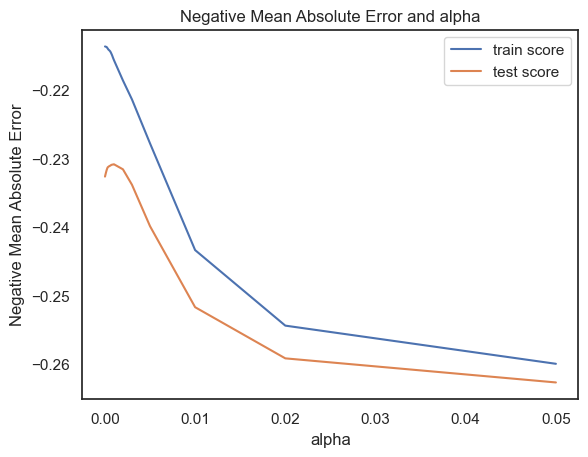

In [671]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [672]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.001)

In [673]:
# check the coefficient values with lambda = 0.001

lasso = Lasso(alpha=0.001)
        
lasso.fit(X_train, y_train) 
print("Intercept: ",lasso.intercept_)
print("Coefficients:\n ",lasso.coef_)

Intercept:  -0.08536128873332775
Coefficients:
  [ 0.0720343   0.17869142  0.0712015   0.07250935  0.11147443  0.01527352
  0.10567899  0.34459602 -0.05745312 -0.03786798  0.09287823 -0.19282223
  0.06053101  0.05945954  0.02366062  0.         -0.19497037 -0.29004472
 -0.29970063  0.          0.          0.21893616  0.39275607  0.1757482
  0.13258301  0.39291519  0.55776292  0.0300465   0.15744274 -0.
  0.13567633  0.04829003  0.          0.0340318  -0.06714652 -0.
 -0.          0.09543904 -0.         -0.07079317  0.13194509 -0.
 -0.          0.26175932 -0.          0.         -0.         -0.
  0.15006238  0.0012505 ]


In [674]:
##Making predictions for train and test sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model (Original Model: alpha=0.001):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model (Original Model: alpha=0.001):
 ****************************************

For Train Set:
R2 score: 0.8991175807585077 
MSE score: 0.10088241924149234 
MAE score: 0.21678903513244718 
RMSE score: 0.3176199289111002

For Test Set:
R2 score: 0.8903426824542664 
MSE score: 0.10189231714520969 
MAE score: 0.228504671845209 
RMSE score: 0.31920575988727035 
 ****************************************


In [675]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)  #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0  Neighborhood_StoneBr       0.5578                            0.5578
1  Neighborhood_NridgHt       0.3929                            0.3929
2  Neighborhood_Crawfor       0.3928                            0.3928
3             GrLivArea       0.3446                            0.3446
4        MSSubClass_160      -0.2997                            0.2997
5        MSSubClass_120      -0.2900                            0.2900
6   Exterior1st_BrkFace       0.2618                            0.2618
7  Neighborhood_BrkSide       0.2189                            0.2189
8         MSSubClass_90      -0.1950                            0.1950
9         AgeofProperty      -0.1928                            0.1928

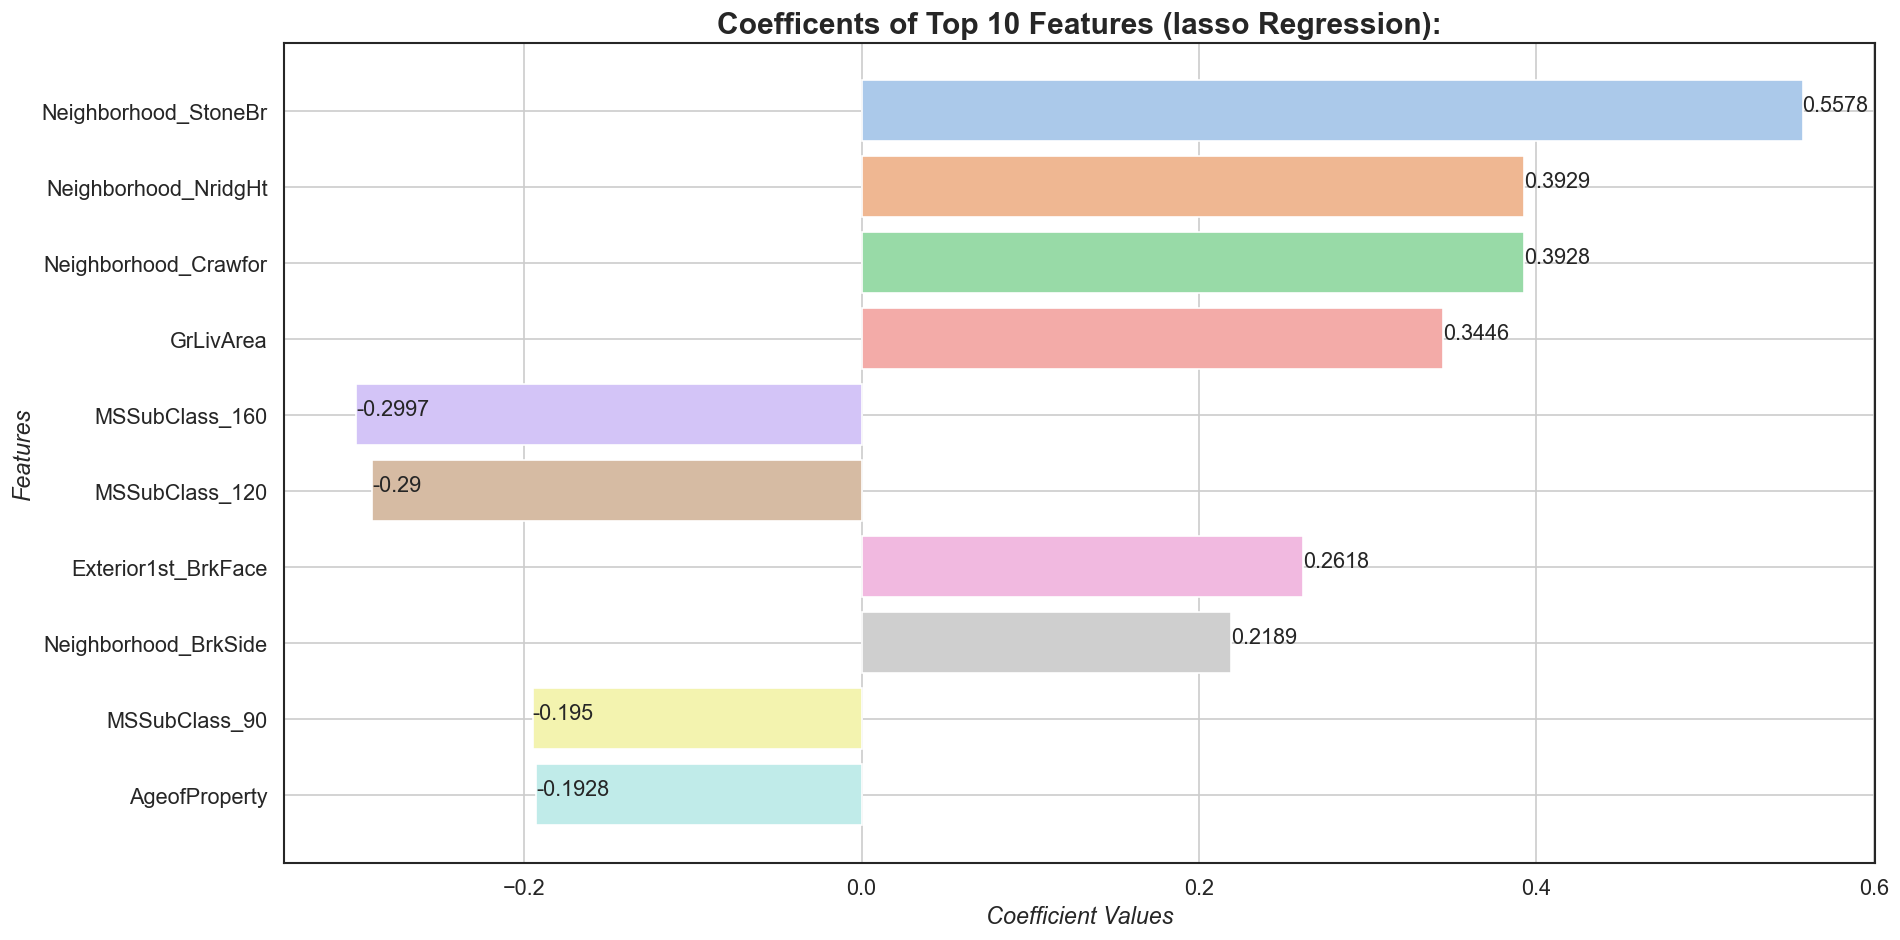

In [676]:
##Coefficient value plot (Ridge Regression)

top10_lasso_df = lasso_df.loc[:9] # Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16, 8), dpi=120)
ax3 = sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='pastel')  # Use a pastel color palette

plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (lasso Regression):', fontsize=18, fontweight='bold')

coef = top10_lasso_df['Coefficient'] # Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


In [677]:
##Creating the list of top 5 features from Lasso Regression Model
top5_original_lasso_features = list(top10_lasso_df['Features'].iloc[0:5])
top5_original_lasso_features

['Neighborhood_StoneBr',
 'Neighborhood_NridgHt',
 'Neighborhood_Crawfor',
 'GrLivArea',
 'MSSubClass_160']

#### Residual Analysis of Model

##### For Train Set:

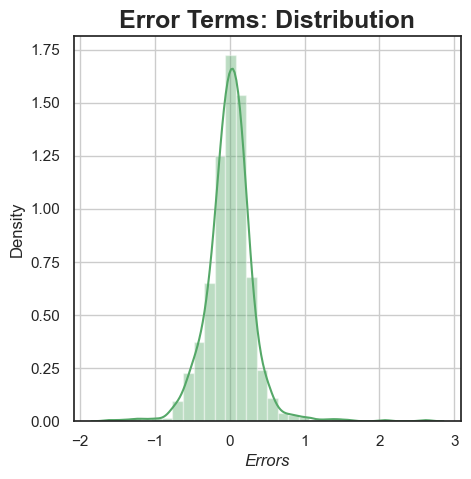

In [678]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_train - y_pred_train_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

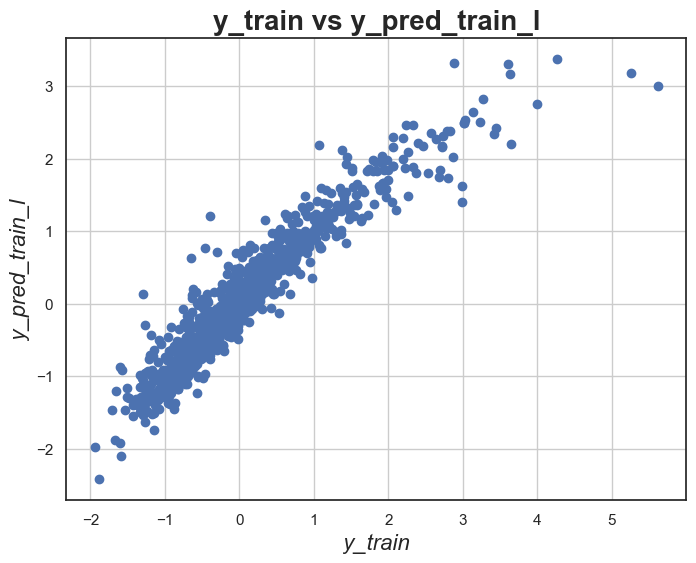

In [679]:
# Plotting y_train and y_train_pred to understand the residuals.
sns.set_style('white')
plt.figure(figsize = (8,6))
plt.scatter(y_train,y_pred_train_l)
plt.title('y_train vs y_pred_train_l', fontweight='bold', fontsize = 20)           
plt.xlabel('y_train', fontstyle='italic', fontsize = 16)              
plt.ylabel('y_pred_train_l', fontstyle='italic', fontsize = 16) 
plt.grid(True)
plt.show()

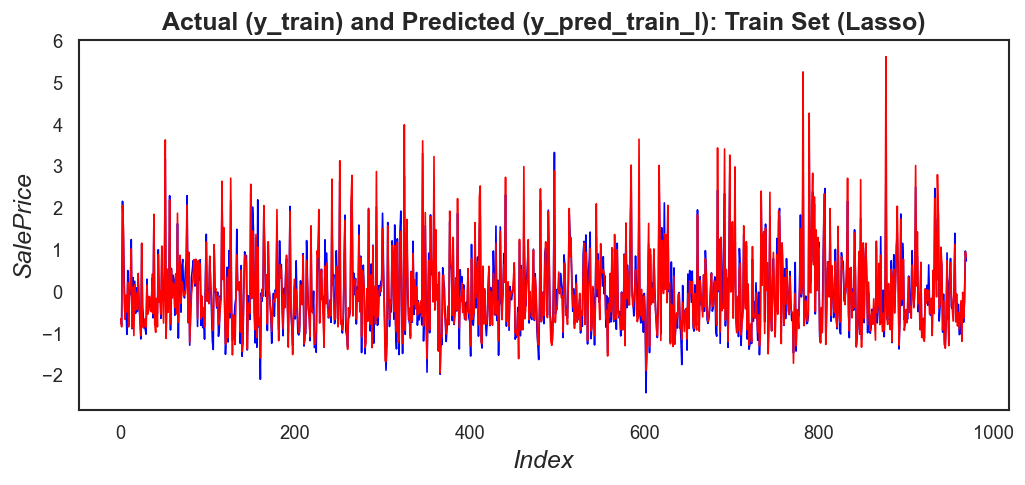

In [680]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize=(10, 4), dpi=120)

# Use the minimum length of the two arrays
length = min(len(y_pred_train_l), len(y_train))

# Create index arrays with the correct length
f = [i for i in range(length)]
g = [i for i in range(length)]

# Plot the first `length` elements of y_pred_train_r and y_train
plt.plot(f, y_pred_train_l[:length], color="blue", linewidth=1, linestyle="-")  # Predicted 'y_pred_train_r' plot
plt.plot(g, y_train[:length], color="red", linewidth=1, linestyle="-")  # Actual 'y_train' plot

plt.title("Actual (y_train) and Predicted (y_pred_train_l): Train Set (Lasso)", fontsize=15, fontweight='bold')
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')
plt.show()


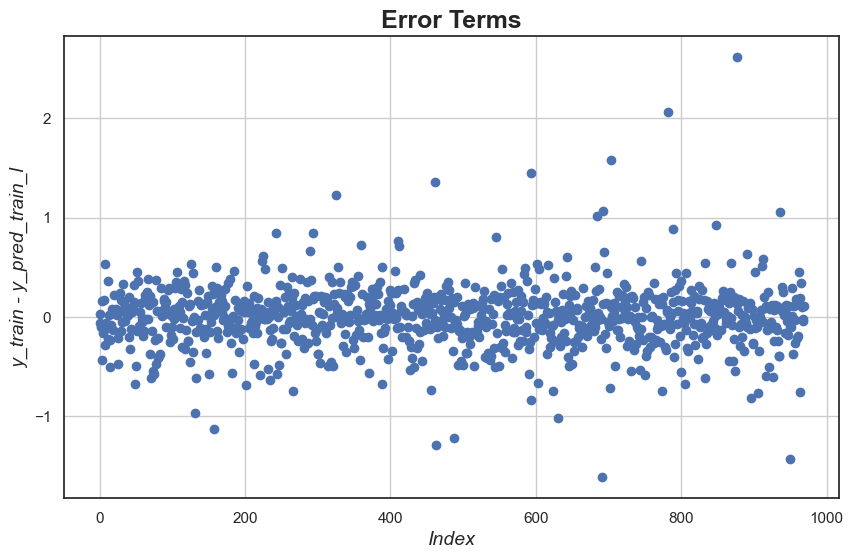

In [681]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize=(10, 6), dpi=100)

# Use the length of y_train as the range for j1
j1 = range(len(y_train))

# Calculate the residuals for the train set
res_train1 = (y_train - y_pred_train_l)

# Plot the error terms
plt.scatter(j1, res_train1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_train - y_pred_train_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()


#### For Test

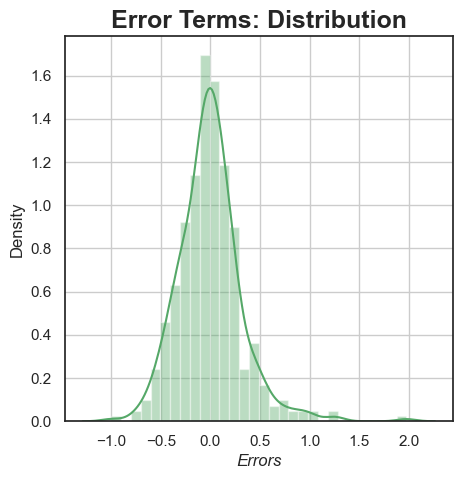

In [682]:
# Plot the histogram of the error terms
sns.set_style('white')
plt.figure(figsize=(5,5), dpi=100)
res1 = (y_test - y_pred_test_l)     #residuals
sns.distplot(res1 , bins = 30, color='g')
plt.title('Error Terms: Distribution', fontweight='bold', fontsize = 18)               
plt.xlabel('Errors', fontstyle='italic', fontsize = 12) 
plt.grid(True)
plt.show()

Error terms seem to be approximately normally distributed with mean 0, so our assumption holds true.

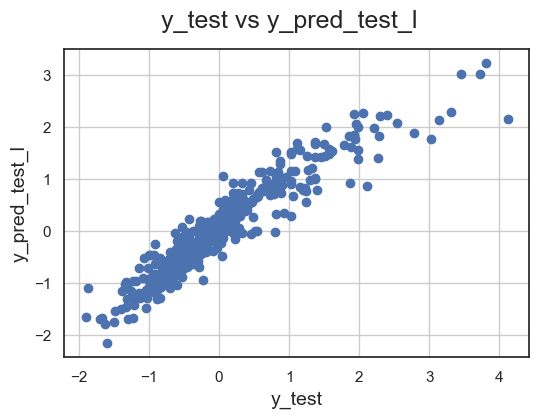

In [683]:
# Plotting y_test and y_pred_test_l to understand the spread.
sns.set_style('white')
fig = plt.figure(figsize=(6,4), dpi=100)
plt.scatter(y_test,y_pred_test_l)
fig.suptitle('y_test vs y_pred_test_l', fontsize=18)             
plt.xlabel('y_test', fontsize=14)                       
plt.ylabel('y_pred_test_l', fontsize=14)  
plt.grid(True)
plt.show()

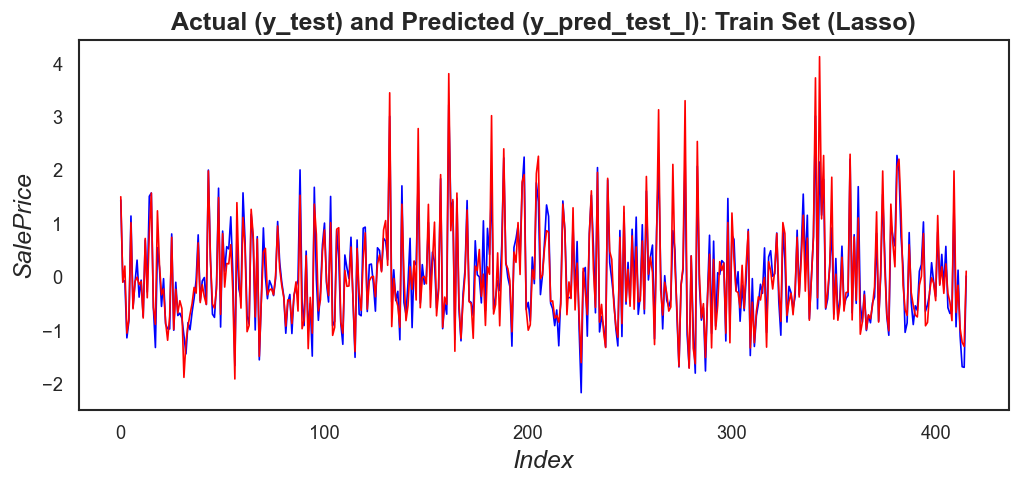

In [684]:
# Actual and Predicted (Train Set)
sns.set_style('white')
plt.figure(figsize=(10, 4), dpi=120)

# Use the minimum length of the two arrays
length = min(len(y_pred_test_l), len(y_test))

# Create index arrays with the correct length
f = [i for i in range(length)]
g = [i for i in range(length)]

# Plot the first `length` elements of y_pred_train_r and y_train
plt.plot(f, y_pred_test_l[:length], color="blue", linewidth=1, linestyle="-")  # Predicted 'y_pred_train_r' plot
plt.plot(g, y_test[:length], color="red", linewidth=1, linestyle="-")  # Actual 'y_train' plot

plt.title("Actual (y_test) and Predicted (y_pred_test_l): Train Set (Lasso)", fontsize=15, fontweight='bold')
plt.xlabel('Index', fontsize=15, fontstyle='italic')
plt.ylabel('SalePrice', fontsize=15, fontstyle='italic')
plt.show()


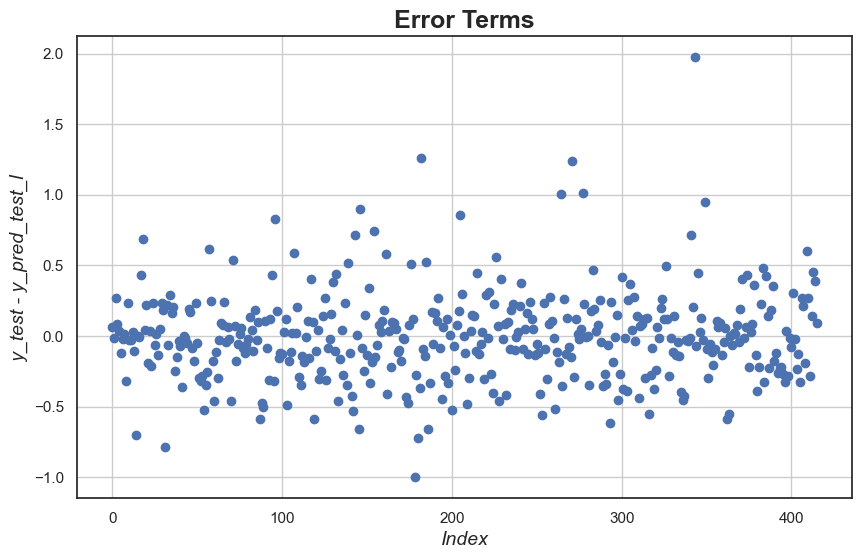

In [685]:
# Error terms for train set
sns.set_style('white')
plt.figure(figsize=(10, 6), dpi=100)

# Use the length of y_train as the range for j1
j1 = range(len(y_test))

# Calculate the residuals for the train set
res_test1 = (y_test - y_pred_test_l)

# Plot the error terms
plt.scatter(j1, res_test1)

plt.title('Error Terms', fontsize=18, fontweight='bold')              
plt.xlabel('Index', fontstyle='italic', fontsize=14)                      
plt.ylabel('y_test - y_pred_test_l', fontstyle='italic', fontsize=14)   
plt.grid(True)
plt.show()


## Subjective Questions

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [686]:
##Optimal Value of alpha for ridge and lasso regression computed above

optimal_alpha_ridge = 4.0       
optimal_alpha_lasso = 0.001    


Changes to the model when we double the value of alpha for both ridge and lasso regression

In [691]:
# Ridge
##Checking the outcome: coefficient values with double the value of alpha = 4*2 = 8

ridge = Ridge(alpha=8.0)

ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

Intercept:  -0.08101250954650735
Coefficients:
 [ 0.08045727  0.18478229  0.07193364  0.07681899  0.11449148  0.01641076
  0.11049283  0.34129279 -0.0570005  -0.04157769  0.0972051  -0.18467051
  0.06533621  0.06066731  0.05390069  0.02337118 -0.17542736 -0.21887464
 -0.25027114  0.02839547  0.037782    0.20176546  0.3111018   0.12852701
  0.11695371  0.31207149  0.40086683  0.04531443  0.12298921 -0.01887855
  0.13855331  0.05203339  0.07959825  0.04284457 -0.09225503 -0.05564796
 -0.02552857  0.0957156  -0.09390104 -0.08603612  0.1295923  -0.00093141
 -0.080909    0.22643278 -0.02284269  0.05706467  0.00147781 -0.006855
  0.16827016  0.00386522]


In [692]:
##Making predictions for train and test sets: Ridge Regression Model
y_pred_train_r = ridge.predict(X_train)
y_pred_test_r = ridge.predict(X_test)

##R2 score for Ridge Regression Model
r2_score_ridge_train = r2_score(y_true= y_train, y_pred= y_pred_train_r)
r2_score_ridge_test = r2_score(y_true= y_test, y_pred= y_pred_test_r)

##Check the mean squared error (MSE) for Ridge Regression Model
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_r)
MSE_ridge_test = mean_squared_error(y_test, y_pred_test_r)

##Mean Absolute error for train and test sets
MAE_ridge_train = mean_absolute_error(y_train, y_pred_train_r)
MAE_ridge_test = mean_absolute_error(y_test, y_pred_test_r)

##Root Mean Squared Error for Train and Test Sets
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)


print("For Ridge Regression Model (Doubled alpha model, alpha=4*2=8):\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_ridge_train,"\nMSE score:",MSE_ridge_train,"\nMAE score:",MAE_ridge_train,\
     "\nRMSE score:",RMSE_ridge_train)
print("\nFor Test Set:\nR2 score:",r2_score_ridge_test,"\nMSE score:",MSE_ridge_test,"\nMAE score:",MAE_ridge_test,\
      "\nRMSE score:",RMSE_ridge_test,"\n","*"*40)

For Ridge Regression Model (Doubled alpha model, alpha=4*2=8):
 ****************************************

For Train Set:
R2 score: 0.8979907381055817 
MSE score: 0.10200926189441831 
MAE score: 0.21738027947892058 
RMSE score: 0.31938888818244493

For Test Set:
R2 score: 0.8918476817745514 
MSE score: 0.1004938891015741 
MAE score: 0.2259149762361879 
RMSE score: 0.31700771142288336 
 ****************************************


In [693]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
0  Neighborhood_StoneBr       0.4009                            0.4009
1             GrLivArea       0.3413                            0.3413
2  Neighborhood_NridgHt       0.3121                            0.3121
3  Neighborhood_Crawfor       0.3111                            0.3111
4        MSSubClass_160      -0.2503                            0.2503
5   Exterior1st_BrkFace       0.2264                            0.2264
6        MSSubClass_120      -0.2189                            0.2189
7  Neighborhood_BrkSide       0.2018                            0.2018
8           OverallQual       0.1848                            0.1848
9         AgeofProperty      -0.1847                            0.1847

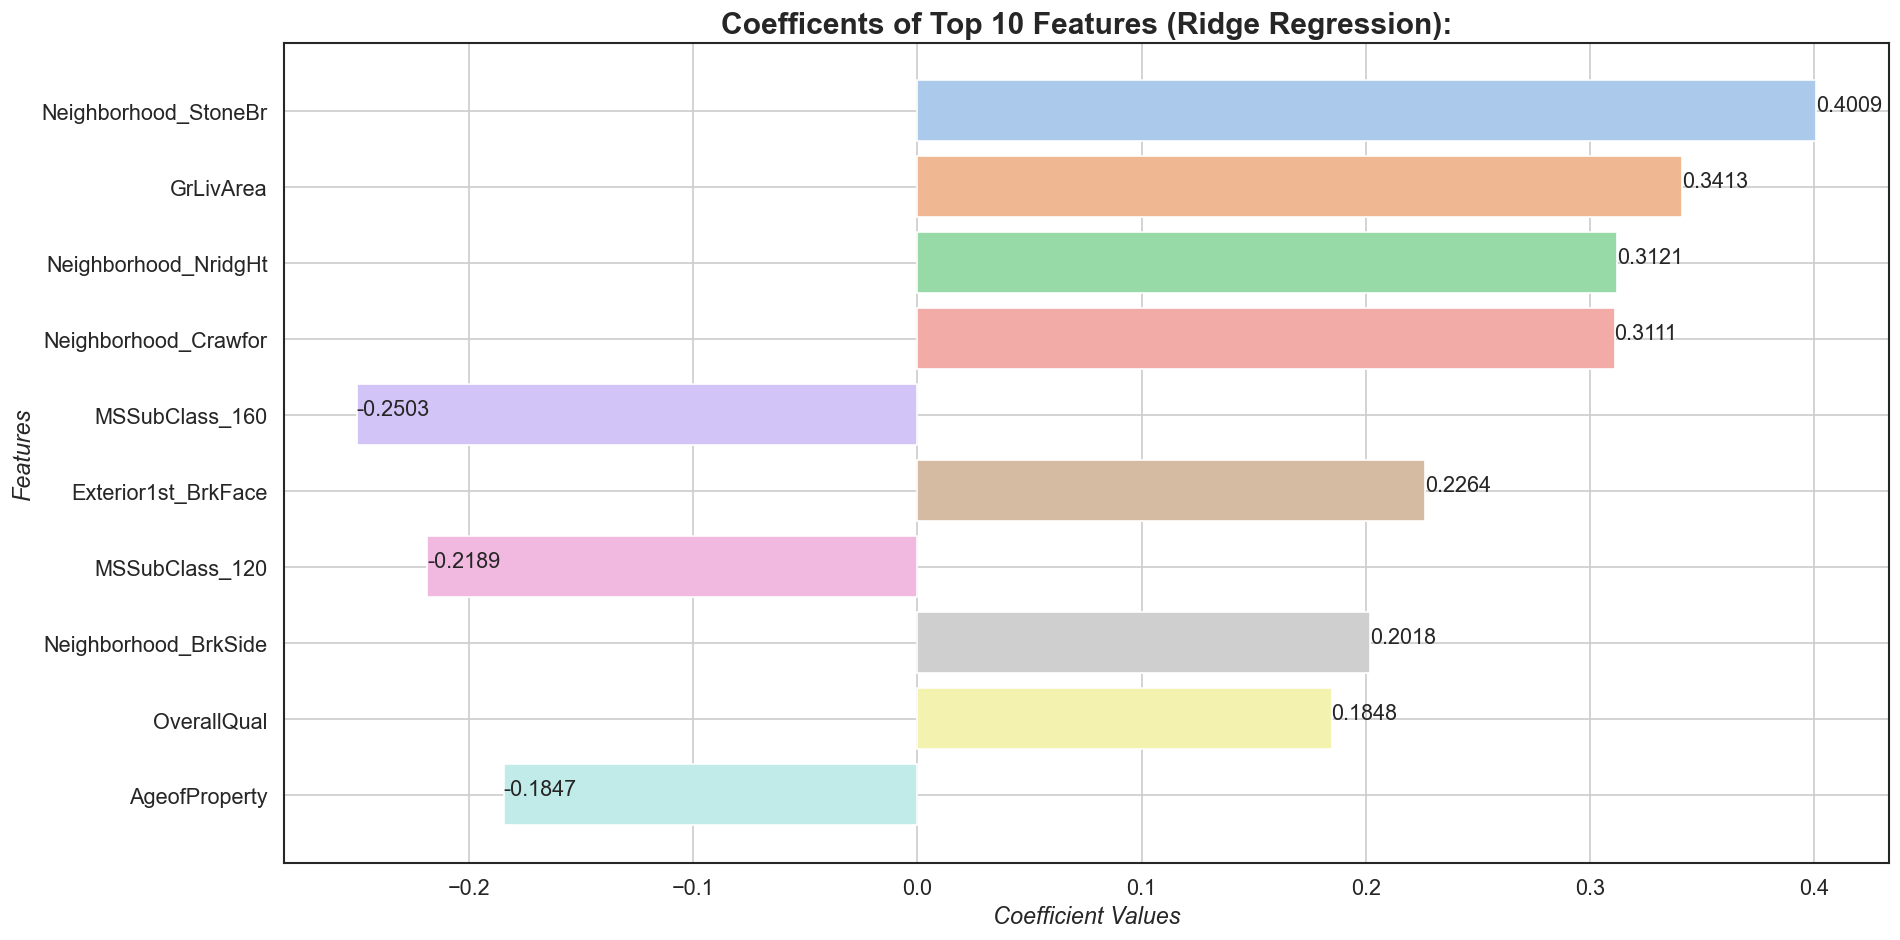

In [694]:
##Coefficient value plot (Ridge Regression)

top10_ridge_df = ridge_df.loc[:9] # Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16, 8), dpi=120)
ax3 = sns.barplot(y=top10_ridge_df['Features'], x=top10_ridge_df['Coefficient'], palette='pastel')  # Use a pastel color palette

plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (Ridge Regression):', fontsize=18, fontweight='bold')

coef = top10_ridge_df['Coefficient'] # Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


In [696]:
print("For Ridge Regression (Doubled alpha model, alpha=4*2=8): \n","*"*100)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_ridge_df['Features']),"\n", "*"*100)

For Ridge Regression (Doubled alpha model, alpha=4*2=8): 
 ****************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['Neighborhood_StoneBr', 'GrLivArea', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor', 'MSSubClass_160', 'Exterior1st_BrkFace', 'MSSubClass_120', 'Neighborhood_BrkSide', 'OverallQual', 'AgeofProperty'] 
 ****************************************************************************************************


In [584]:
#Lasso Regression

In [585]:
##Checking the outcome: coefficient values with double the value of alpha = 0.001*2 = 0.002 (For Lasso Regression)

lasso = Lasso(alpha=0.002)
        
lasso.fit(X_train, y_train) 
print("Intercept: ", lasso.intercept_)
print("Coefficients:\n ", lasso.coef_)

Intercept:  -0.06550540079822242
Coefficients:
  [ 0.07722128  0.18592234  0.0716166   0.07306803  0.11290225  0.01308714
  0.10961184  0.34660324 -0.0558162  -0.0361883   0.09378933 -0.17983863
  0.0662815   0.06119265  0.         -0.         -0.16274026 -0.22408963
 -0.23429787  0.          0.          0.19352805  0.34558006  0.
  0.06513299  0.33959307  0.46922852  0.          0.         -0.
  0.09984562  0.0288443   0.          0.01774774 -0.03135028 -0.
 -0.          0.08700057 -0.         -0.07846592  0.11344132 -0.
 -0.          0.22130486 -0.          0.         -0.         -0.
  0.14073816 -0.        ]


In [586]:
##RMaking predictions for test and train sets: Lasso Regression Model
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

##R2 score for Lasso Regression Model
r2_score_lasso_train = r2_score(y_true= y_train, y_pred= y_pred_train_l)
r2_score_lasso_test = r2_score(y_true= y_test, y_pred= y_pred_test_l)

##Check the mean squared error (MSE) for Lasso Regression Model
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_l)
MSE_lasso_test = mean_squared_error(y_test, y_pred_test_l)

##Mean Absolute error for train and test sets
MAE_lasso_train = mean_absolute_error(y_train, y_pred_train_l)
MAE_lasso_test = mean_absolute_error(y_test, y_pred_test_l)

##Root Mean Squared Error for Train and Test Sets
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)

print("For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)\n","*"*40)
print("\nFor Train Set:\nR2 score:",r2_score_lasso_train,"\nMSE score:",MSE_lasso_train,"\nMAE score:",MAE_lasso_train,\
     "\nRMSE score:",RMSE_lasso_train)
print("\nFor Test Set:\nR2 score:",r2_score_lasso_test,"\nMSE score:",MSE_lasso_test,"\nMAE score:",MAE_lasso_test,\
      "\nRMSE score:",RMSE_lasso_test,"\n","*"*40)

For Lasso Regression Model: (Doubled alpha model: alpha:0.001*2 = 0.002)
 ****************************************

For Train Set:
R2 score: 0.8962362283965272 
MSE score: 0.10376377160347287 
MAE score: 0.2192566387666148 
RMSE score: 0.3221238451333165

For Test Set:
R2 score: 0.8922281355114673 
MSE score: 0.10014037586881841 
MAE score: 0.22777127811534406 
RMSE score: 0.316449641916085 
 ****************************************


In [587]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0  Neighborhood_StoneBr       0.4692                            0.4692
1             GrLivArea       0.3466                            0.3466
2  Neighborhood_Crawfor       0.3456                            0.3456
3  Neighborhood_NridgHt       0.3396                            0.3396
4        MSSubClass_160      -0.2343                            0.2343
5        MSSubClass_120      -0.2241                            0.2241
6   Exterior1st_BrkFace       0.2213                            0.2213
7  Neighborhood_BrkSide       0.1935                            0.1935
8           OverallQual       0.1859                            0.1859
9         AgeofProperty      -0.1798                            0.1798

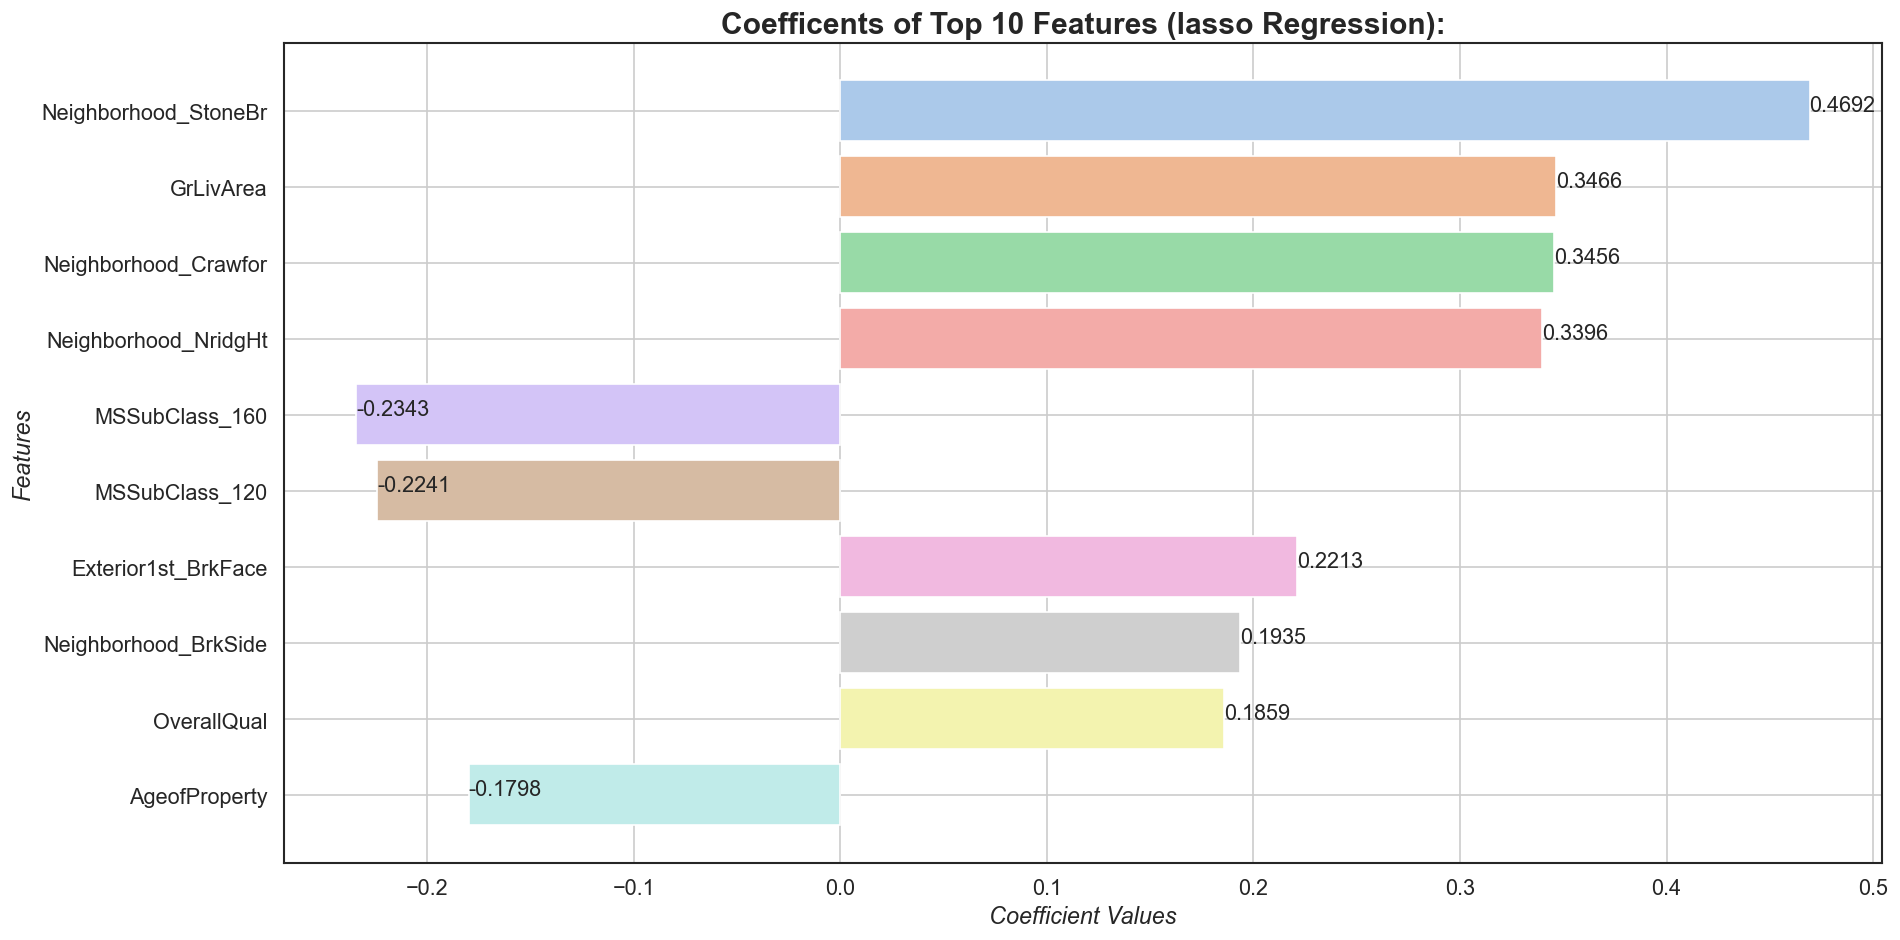

In [588]:
##Coefficient value plot (Ridge Regression)

top10_lasso_df = lasso_df.loc[:9] # Ridge_df with top 10 coefficients

sns.set(style='white')
plt.figure(figsize=(16, 8), dpi=120)
ax3 = sns.barplot(y=top10_lasso_df['Features'], x=top10_lasso_df['Coefficient'], palette='pastel')  # Use a pastel color palette

plt.xlabel('Coefficient Values', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
plt.title('Coefficents of Top 10 Features (lasso Regression):', fontsize=18, fontweight='bold')

coef = top10_lasso_df['Coefficient'] # Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)

plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()


In [697]:
print("For Lasso Regression (Doubled alpha model: alpha:0.001*2 = 0.002): \n","*"*100)
print("The most important top10 predictor variables after the change is implemented are as follows:\n\n",\
      list(top10_lasso_df['Features']),"\n", "*"*100)

For Lasso Regression (Doubled alpha model: alpha:0.001*2 = 0.002): 
 ****************************************************************************************************
The most important top10 predictor variables after the change is implemented are as follows:

 ['Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor', 'GrLivArea', 'MSSubClass_160', 'MSSubClass_120', 'Exterior1st_BrkFace', 'Neighborhood_BrkSide', 'MSSubClass_90', 'AgeofProperty'] 
 ****************************************************************************************************


**Question 3:** After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [698]:
##From Original Lasso Regression Model, import 'top5_original_lasso_features': Top5 features
print("Top 5 features in original lasso model (dropped):\n", top5_original_lasso_features)

df= df_new1

##Removing these top5 features (as per Original Lasso Model) from 'df'
df= df.drop(top5_original_lasso_features, axis=1)
df.head()

Top 5 features in original lasso model (dropped):
 ['Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'Neighborhood_Crawfor', 'GrLivArea', 'MSSubClass_160']


LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  LowQualFinSF  BsmtFullBath  \
0           0        150          856             0             1   
1           0        284         1262             0             0   
2           0        434          920             0             1   
3           0        540          756             0             1   
4           0        490         1145             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  \
0             0         2         1             3             1           0   
1             1         2         0             3             1           1   
2             0         2         1             3             1           1   
3             0         1         0             3             1           1   
4             0         2         1             4             1           1   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         2003         548           0           61              0          0   
1         1976         460         298            0              0          0   
2         2001         608           0           42              0          0   
3         1998         642           0           35            272          0   
4         2000         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  SalePrice  WhetherRemodelled  \
0            0         0        0     208500                  0   
1            0         0        0     181500                  0   
2            0         0        0     223500                  1   
3            0         0        0     140000                  1   
4            0         0        0     250000                  0   

   AgeofProperty  d_LotShape  d_ExterQual  d_BsmtQual  d_BsmtExposure  \
0              5           3            4           4               1   
1             31           3            3           4               4   
2              7           2            4           4               2   
3             91           2            3           3               1   
4              8           2            4           4               3   

   d_BsmtFinType1  d_HeatingQC  d_KitchenQual  d_GarageFinish  MSSubClass_30  \
0               6            5              4               2              0   
1               5            5              3               2              0   
2               6            5              4               2              0   
3               5            4              4               1              0   
4               6            5              4               2              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0              0              0              1   
4              0              0              0              1              0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
0              0              0              0              0               0   
1              0              0              0              0               0   
2              0              0              0              0               0   
3              0              0    

In [699]:
##Creating a function to find binary value columns from the 'df' dataframe (if any)
def binary_val_cols(df):
    df_1 = df.copy()
    dualsvcol = (df_1.nunique()==2)
    list_dualsvcol = list(dualsvcol[dualsvcol.values==True].index)
    return list_dualsvcol

binary_cols = binary_val_cols(df)

In [700]:
##split into train and test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [701]:
##Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols]
df_binary_test = df_test.loc[:, binary_cols]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop(binary_cols, axis=1)
df_test = df_test.drop(binary_cols, axis=1)

##StandardScaler

from sklearn.preprocessing import StandardScaler
all_cols =df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_cols] = scaler.fit_transform(df_train[all_cols])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler fit_transform on test data
df_test[all_cols] = scaler.transform(df_test[all_cols])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [702]:
##Storing target variable to y_train and y_test respectively

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [703]:
##Storing all feature variables to X_train and X_test
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

In [705]:
##Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=50)                  # running RFE
rfe = rfe.fit(X_train, y_train)

In [706]:
##my_zip file zips features, rfe.support_ and rfe.ranking_
my_zip = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
my_zip

[('LotFrontage', False, 30),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 27),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('LowQualFinSF', False, 68),
 ('BsmtFullBath', False, 28),
 ('BsmtHalfBath', False, 70),
 ('FullBath', False, 6),
 ('HalfBath', False, 16),
 ('BedroomAbvGr', False, 67),
 ('KitchenAbvGr', False, 37),
 ('Fireplaces', False, 34),
 ('GarageYrBlt', False, 15),
 ('GarageArea', False, 9),
 ('WoodDeckSF', False, 29),
 ('OpenPorchSF', False, 32),
 ('EnclosedPorch', False, 55),
 ('3SsnPorch', False, 35),
 ('ScreenPorch', False, 51),
 ('PoolArea', False, 56),
 ('MiscVal', False, 71),
 ('AgeofProperty', False, 26),
 ('d_LotShape', False, 47),
 ('d_ExterQual', False, 33),
 ('d_BsmtQual', False, 39),
 ('d_BsmtExposure', False, 20),
 ('d_BsmtFinType1', False, 61),
 ('d_HeatingQC', False, 57),
 ('d_KitchenQual', True, 1),
 ('d_GarageFinish', False, 66),
 ('Whether

In [707]:
##Checking columns that have RFE support
col_rfe_sup = X_train.columns[rfe.support_]
col_rfe_sup

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'd_KitchenQual', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60',
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120',
       'LotConfig_FR2', 'MSZoning_FV', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Timber', 'Exterior2nd_AsphShn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'HouseStyle_2.5Unf', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'RoofStyle_Mansard',
       'Exterior1st_AsphShn', 'Ext

In [708]:
##Creating a dataframe for RFE supported top 50 indepedent variables. 

top50_df = pd.DataFrame(my_zip, columns=['Features', 'rfe_support', 'rfe_ranking']) # assign the 50 features selected using RFE to a dataframe and view them

top50_df = top50_df.loc[top50_df['rfe_support'] == True]
top50_df.reset_index(drop=True, inplace=True)

top50_df

Features  rfe_support  rfe_ranking
0                LotArea         True            1
1            OverallQual         True            1
2             BsmtFinSF1         True            1
3              BsmtUnfSF         True            1
4            TotalBsmtSF         True            1
5          d_KitchenQual         True            1
6          MSSubClass_45         True            1
7          MSSubClass_50         True            1
8          MSSubClass_60         True            1
9          MSSubClass_70         True            1
10         MSSubClass_75         True            1
11         MSSubClass_90         True            1
12        MSSubClass_120         True            1
13         LotConfig_FR2         True            1
14           MSZoning_FV         True            1
15   Neighborhood_BrDale         True            1
16  Neighborhood_BrkSide         True            1
17  Neighborhood_ClearCr         True            1
18  Neighborhood_CollgCr         True            1
19  Neighborhood_Edwards         True            1
20  Neighborhood_Gilbert         True            1
21   Neighborhood_IDOTRR         True            1
22  Neighborhood_MeadowV         True            1
23  Neighborhood_Mitchel         True            1
24    Neighborhood_NAmes         True            1
25  Neighborhood_NPkVill         True            1
26   Neighborhood_NWAmes         True            1
27  Neighborhood_NoRidge         True            1
28  Neighborhood_OldTown         True            1
29    Neighborhood_SWISU         True            1
30   Neighborhood_Sawyer         True            1
31  Neighborhood_SawyerW         True            1
32   Neighborhood_Timber         True            1
33   Exterior2nd_AsphShn         True            1
34   Exterior2nd_BrkFace         True            1
35   Exterior2nd_CmentBd         True            1
36    Exterior2nd_Stucco         True            1
37   Exterior2nd_Wd Shng         True            1
38     HouseStyle_2.5Unf         True            1
39      Foundation_PConc         True            1
40       Foundation_Slab         True            1
41      Foundation_Stone         True            1
42     RoofStyle_Mansard         True            1
43   Exterior1st_AsphShn         True            1
44   Exterior1st_BrkComm         True            1
45   Exterior1st_BrkFace         True            1
46   Exterior1st_ImStucc         True            1
47    Exterior1st_Stucco         True            1
48   Exterior1st_WdShing         True            1
49    GarageType_BuiltIn         True            1

In [709]:
##Let's Assign top 50 columns to X_train_rfe

X_train_rfe = X_train[col_rfe_sup]

In [710]:
##Making sure that we have only 50 features (supported by RFE) in X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [711]:
##Lasso Regression Model Building
lasso = Lasso()

##List of alphas (lambda parameter)

params_1 = {'alpha': [0.00001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,0.0008, 0.0009, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                      0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_1, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0003, 0.0004,
                                   0.0005, 0.0006, 0.0007, 0.0008, 0.0009,
                                   0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [712]:
##Display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0      0.00001         -0.251147        -0.270849                1
1       0.0001         -0.251512        -0.271028                2
2       0.0002         -0.252282        -0.271303                3
3       0.0003         -0.252979        -0.271714                4
4       0.0004         -0.253722        -0.272189                5
5       0.0005         -0.254636        -0.272685                6
6       0.0006         -0.255656        -0.273208                7
7       0.0007         -0.256720        -0.273786                8
8       0.0008         -0.257816        -0.274477                9
9       0.0009         -0.259032        -0.275281               10
10       0.001         -0.260374        -0.276153               11
11       0.005         -0.293598        -0.303199               12
12        0.01         -0.311806        -0.317829               13
13        0.05         -0.336930        -0.339042               14
14         0.1         -0.352304        -0.354953               15
15         0.2         -0.390374        -0.394173               16
16         0.3         -0.444431        -0.447301               17
17         0.4         -0.504606        -0.507998               18
18         0.5         -0.566488        -0.568733               19
19         0.6         -0.623184        -0.625257               20
20         0.7         -0.683835        -0.685592               21
21         0.8         -0.737126        -0.737892               22
35         100         -0.743402        -0.743798               23
34          50         -0.743402        -0.743798               23
33          20         -0.743402        -0.743798               23
32        10.0         -0.743402        -0.743798               23
31         9.0         -0.743402        -0.743798               23
30         8.0         -0.743402        -0.743798               23
29         7.0         -0.743402        -0.743798               23
28         6.0         -0.743402        -0.743798               23
27         5.0         -0.743402        -0.743798               23
26         4.0         -0.743402        -0.743798               23
25         3.0         -0.743402        -0.743798               23
24         2.0         -0.743402        -0.743798               23
23         1.0         -0.743402        -0.743798               23
22         0.9         -0.743402        -0.743798               23
36         500         -0.743402        -0.743798               23
37        1000         -0.743402        -0.743798               23

In [713]:
##Plotting a magnified graph for a lower range of alpha.

lasso = Lasso()

##List of alphas (lambda parameter: consider smaller range on the basis of lasso_cv_results table ranking)

params_2 = {'alpha': [0.00001, 0.00009, 0.00005, 0.00003, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02, 0.05]}

##Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params_2, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 9e-05, 5e-05, 3e-05, 0.0001, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.005, 0.01, 0.02,
                                   0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [714]:
##ReDisplay the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
0      0.00001         -0.251147        -0.270849                1
3      0.00003         -0.251183        -0.270868                2
2      0.00005         -0.251250        -0.270916                3
1      0.00009         -0.251453        -0.271010                4
4       0.0001         -0.251512        -0.271028                5
5       0.0002         -0.252282        -0.271303                6
6       0.0003         -0.252979        -0.271714                7
7       0.0004         -0.253722        -0.272189                8
8       0.0005         -0.254636        -0.272685                9
9       0.0006         -0.255656        -0.273208               10
10      0.0007         -0.256720        -0.273786               11
11      0.0008         -0.257816        -0.274477               12
12      0.0009         -0.259032        -0.275281               13
13       0.001         -0.260374        -0.276153               14
14       0.005         -0.293598        -0.303199               15
15        0.01         -0.311806        -0.317829               16
16        0.02         -0.317646        -0.322257               17
17        0.05         -0.336930        -0.339042               18

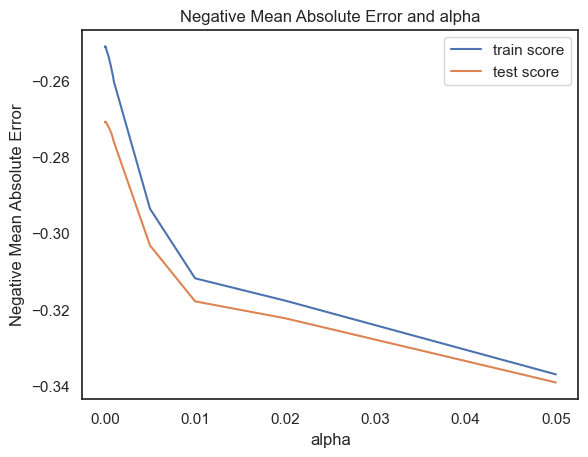

In [715]:
##Plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

##plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [716]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=1e-05)

In [717]:
# check the coefficient values with (lambda) alpha = 0.0004

lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train, y_train) 
print("Intercepts: ",lasso.intercept_)
print("Coefficients:\n",lasso.coef_)

Intercepts:  0.27683439705990687
Coefficients:
 [ 0.11224736  0.293021    0.0966618  -0.04382268  0.32775623  0.12317278
 -0.29033131  0.13613552  0.48510521  0.21875807  0.5818824  -0.10329256
 -0.34595667 -0.08392355 -0.29695605 -0.53128295 -0.38885932 -0.47326418
 -0.53415944 -0.62236472 -0.73124266 -0.66878539 -0.77909917 -0.66831646
 -0.60520679 -0.23221224 -0.57528458 -0.10509707 -0.6433029  -0.60079152
 -0.60262473 -0.57786715 -0.4741724  -0.3396422  -0.23184407  0.2441009
 -0.40643953 -0.43375458 -0.28752031  0.14084173  0.77072834  0.14583824
  0.60811377  0.86361745 -0.88431714  0.31331511 -0.42690028  0.48672664
  0.13642833  0.50957971]


In [718]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(5)

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
0   Exterior1st_BrkComm      -0.8843                            0.8843
1   Exterior1st_AsphShn       0.8636                            0.8636
2  Neighborhood_MeadowV      -0.7791                            0.7791
3       Foundation_Slab       0.7707                            0.7707
4  Neighborhood_Gilbert      -0.7312                            0.7312

In [720]:
top5_lasso_df= lasso_df.loc[:4]
print("For New Lasso Regression Model (After eliminating the top5 features from the original model):\n","*"*100)
print("The top5 new most important predictor variables are as follows:\n\n",\
      list(top5_lasso_df['Features']),"\n", "*"*100)

For New Lasso Regression Model (After eliminating the top5 features from the original model):
 ****************************************************************************************************
The top5 new most important predictor variables are as follows:

 ['Exterior1st_BrkComm', 'Exterior1st_AsphShn', 'Neighborhood_MeadowV', 'Foundation_Slab', 'Neighborhood_Gilbert'] 
 ****************************************************************************************************
